<a href="https://colab.research.google.com/github/PallaviacharN/BITS_Recommendation_System/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data preprocessing libraries
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# Model
from scipy.stats import skew
import yellowbrick
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Config
mpl.rcParams['font.family'] = 'monospace'
sns.set_theme(style="white", palette=None)
plotly.offline.init_notebook_mode()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
%matplotlib inline

In [5]:
# Reading csv files and drop the first column
fraud = pd.read_csv(r"/content/fraudTrain.csv")
fraud_test = pd.read_csv(r"/content/fraudTest.csv")


# First view 10 rows
fraud.head(10)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   
7           7   2019-01-01 00:05:08  6011360759745864   
8           8   2019-01-01 00:05:18  4922710831011201   
9           9   2019-01-01 00:06:01  2720830304681674   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   
7                fraud_Corwin-Collins  gas_transport   71.65     Steven   
8                    fraud_Herzog Ltd       misc_pos    4.27    Heather   
9   fraud_Schoen, Kuphal and Nitzsche    grocery_pos  198.39    Melissa   

       last gender                          street  ...      lat      long  \
0     Banks      F                  561 Perry Cove  ...  36.0788  -81.1781   
1      Gill      F    43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2   Sanchez      M        594 White Dale Suite 530  ...  42.1808 -112.2620   
3     White      M     9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4    Garcia      M                408 Bradley Rest  ...  38.4207  -79.4629   
5    Conner      F               4655 David Island  ...  40.3750  -75.2045   
6  Richards      F     889 Sarah Station Suite 624  ...  37.9931 -100.9893   
7  Williams      M       231 Flores Pass Suite 720  ...  38.8432  -78.6003   
8     Chase      F     6888 Hicks Stream Suite 954  ...  40.3359  -79.6607   
9   Aguilar      F  21326 Taylor Squares Suite 708  ...  36.5220  -87.3490   

   city_pop                                job         dob  \
0    3495.0          Psychologist, counselling  1988-03-09   
1     149.0  Special educational needs teacher  1978-06-21   
2    4154.0        Nature conservation officer  1962-01-19   
3    1939.0                    Patent attorney  1967-01-12   
4      99.0     Dance movement psychotherapist  1986-03-28   
5    2158.0                  Transport planner  1961-06-19   
6    2691.0                    Arboriculturist  1993-08-16   
7    6018.0               Designer, multimedia  1947-08-21   
8    1472.0          Public affairs consultant  1941-03-07   
9  151785.0                        Pathologist  1974-03-28   

                          trans_num     unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1.325376e+09  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1.325376e+09  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1.325376e+09  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1.325376e+09  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1.325376e+09  37.179198  -87.485381   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       0.0  
8       0.0  
9       0.0  

[10 rows x 23 c

In [6]:
fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852484 entries, 0 to 852483
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             852484 non-null  int64  
 1   trans_date_trans_time  852484 non-null  object 
 2   cc_num                 852484 non-null  int64  
 3   merchant               852484 non-null  object 
 4   category               852484 non-null  object 
 5   amt                    852484 non-null  float64
 6   first                  852484 non-null  object 
 7   last                   852484 non-null  object 
 8   gender                 852484 non-null  object 
 9   street                 852484 non-null  object 
 10  city                   852483 non-null  object 
 11  state                  852483 non-null  object 
 12  zip                    852483 non-null  float64
 13  lat                    852483 non-null  float64
 14  long                   852483 non-nu

In [8]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353

In [9]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

is_fraud
0.0    0.994273
1.0    0.005727
Name: proportion, dtype: float64

Fraud Distribution
is_fraud
0.0    0.994273
1.0    0.005727
Name: proportion, dtype: float64


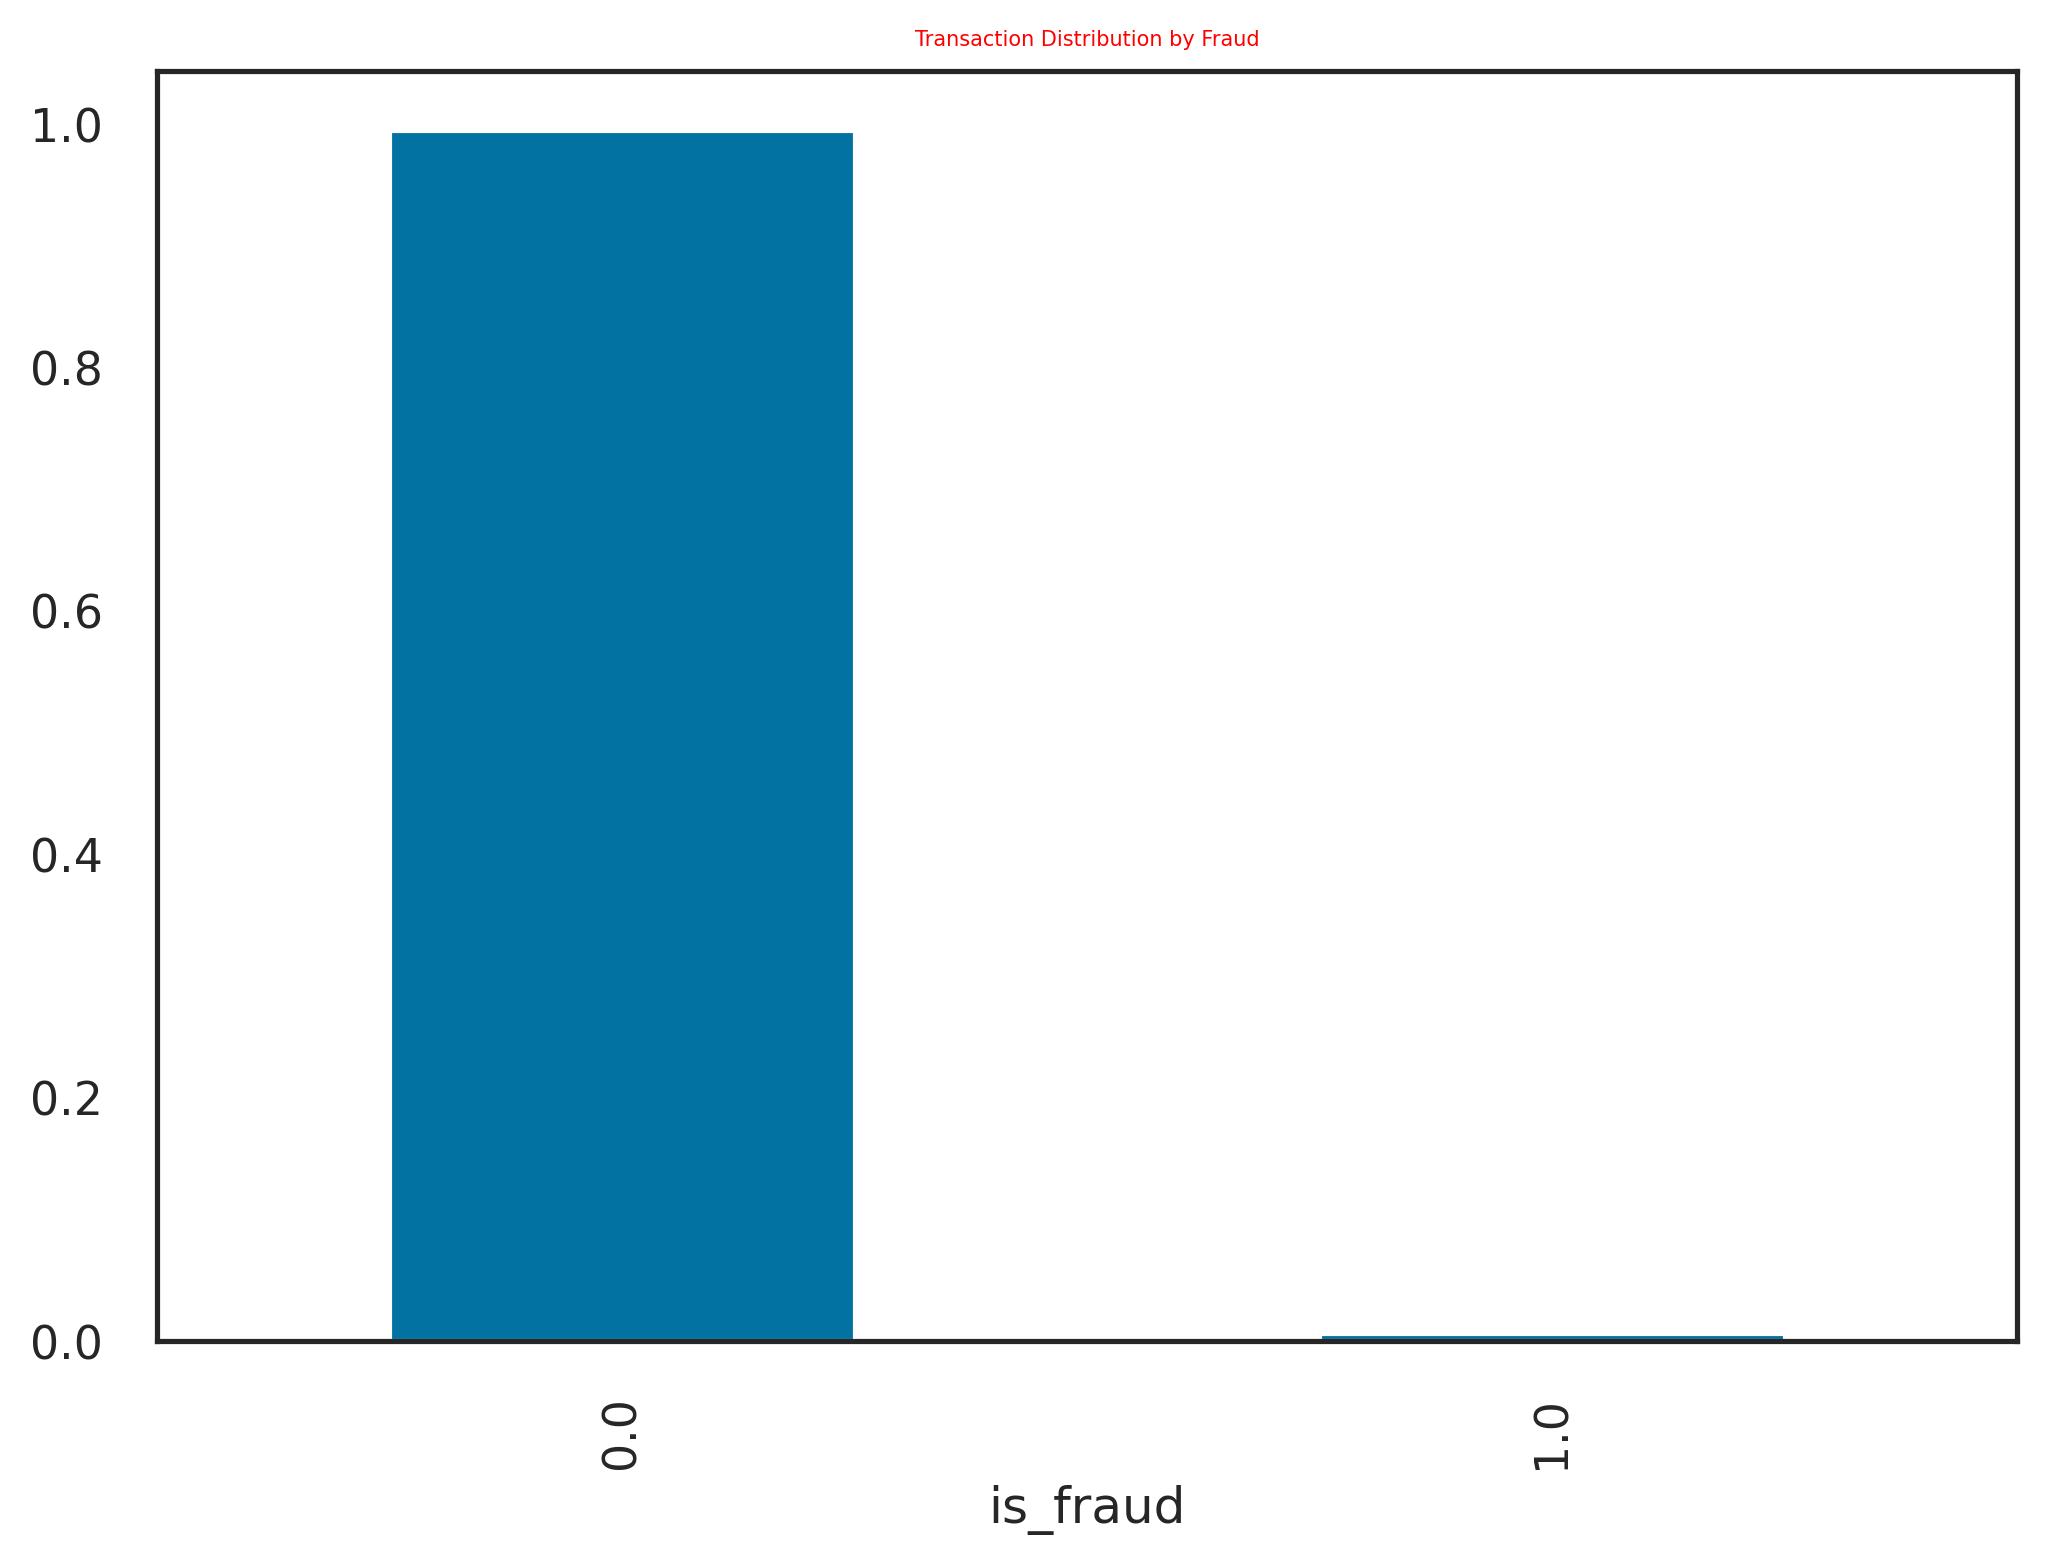

In [12]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 5, color = 'Red', fontweight = 50)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [13]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

is_fraud
0    0.99614
1    0.00386
Name: proportion, dtype: float64

In [14]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [15]:
# Inspecting the fraud dataset
fraud.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state      zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654.0  36.0788  -81.1781    3495.0   
1  107.23      F          Orient    WA  99160.0  48.8878 -118.2105     149.0   
2  220.11      M      Malad City    ID  83252.0  42.1808 -112.2620    4154.0   
3   45.00      M         Boulder    MT  59632.0  46.2306 -112.1138    1939.0   
4   41.96      M        Doe Hill    VA  24433.0  38.4207  -79.4629      99.0   

                                 job         dob     unix_time  merch_lat  \
0          Psychologist, counselling  1988-03-09  1.325376e+09  36.011293   
1  Special educational needs teacher  1978-06-21  1.325376e+09  49.159047   
2        Nature conservation officer  1962-01-19  1.325376e+09  43.150704   
3                    Patent attorney  1967-01-12  1.325376e+09  47.034331   
4     Dance movement psychotherapist  1986-03-28  1.325376e+09  38.674999   

   merch_long  is_fraud  
0  -82.048315       0.0  
1 -118.186462       0.0  
2 -112.154481       0.0  
3 -112.561071       0.0  
4  -78.632459       0.0

In [16]:
# Inspecting the fraud test dataset
fraud_test.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer  1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT  1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public  1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer  1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer  1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [18]:
# Same change on the test dataset
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob'])/ np.timedelta64(1, 'Y')
fraud_test['age'] = fraud_test['age'].astype(int)
fraud_test.drop(['dob'], axis=1, inplace=True)
fraud_test.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job   unix_time  merch_lat  merch_long  is_fraud  age  
0     Mechanical engineer  1371816865  33.986391  -81.200714         0   56  
1  Sales professional, IT  1371816873  39.450498 -109.960431         0   34  
2       Librarian, public  1371816893  40.495810  -74.196111         0   53  
3            Set designer  1371816915  28.812398  -80.883061         0   36  
4      Furniture designer  1371816917  44.959148  -85.884734         0   69

In [19]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state      zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654.0  36.0788  -81.1781    3495.0   
1          Orient    WA  99160.0  48.8878 -118.2105     149.0   
2      Malad City    ID  83252.0  42.1808 -112.2620    4154.0   
3         Boulder    MT  59632.0  46.2306 -112.1138    1939.0   
4        Doe Hill    VA  24433.0  38.4207  -79.4629      99.0   

                                 job        dob     unix_time  merch_lat  \
0          Psychologist, counselling 1988-03-09  1.325376e+09  36.011293   
1  Special educational needs teacher 1978-06-21  1.325376e+09  49.159047   
2        Nature conservation officer 1962-01-19  1.325376e+09  43.150704   
3                    Patent attorney 1967-01-12  1.325376e+09  47.034331   
4     Dance movement psychotherapist 1986-03-28  1.325376e+09  38.674999   

   merch_long  is_fraud        age  trans_date trans_time  
0  -82.048315       0.0  36.319564  2019-01-01   00:00:18  
1 -118.186462       0.0  46.042851  2019-01-01   00:00:44  
2 -112.154481       0.0  62.472988  2019-01-01   00:00:51  
3 -112.561071       0.0  57.489427  2019-01-01   00:01:16  
4  -78.632459       0.0  38.270249  2019-01-01   00:03:06

In [20]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job   unix_time  merch_lat  merch_long  is_fraud  age  \
0     Mechanical engineer  1371816865  33.986391  -81.200714         0   56   
1  Sales professional, IT  1371816873  39.450498 -109.960431         0   34   
2       Librarian, public  1371816893  40.495810  -74.196111         0   53   
3            Set designer  1371816915  28.812398  -80.883061         0   36   
4      Furniture designer  1371816917  44.959148  -85.884734         0   69   

   trans_date trans_time  
0  2020-06-21   12:14:25  
1  2020-06-21   12:14:33  
2  2020-06-21   12:14:53  
3  2020-06-21   12:15:15  
4  2020-06-21   12:15:17

In [21]:
# Check on numeric columns for outliers
fraud.describe()

amt            zip            lat           long  \
count  852484.000000  852483.000000  852483.000000  852483.000000   
mean       70.285937   48791.269962      38.534764     -90.220692   
min         1.000000    1257.000000      20.027100    -165.672300   
25%         9.640000   26237.000000      34.668900     -96.798000   
50%        47.410000   48174.000000      39.354300     -87.476900   
75%        83.072500   72011.000000      41.894800     -80.158000   
max     28948.900000   99783.000000      66.693300     -67.950300   
std       163.184038   26897.321169       5.075064      13.760934   

           city_pop                            dob     unix_time  \
count  8.524830e+05                         852483  8.524830e+05   
mean   8.898661e+04  1973-09-13 13:12:56.690678864  1.341730e+09   
min    2.300000e+01            1924-10-30 00:00:00  1.325376e+09   
25%    7.430000e+02            1962-08-13 00:00:00  1.334801e+09   
50%    2.456000e+03            1975-10-07 00:00:00  1.341919e+09   
75%    2.047800e+04            1987-02-13 00:00:00  1.348912e+09   
max    2.906700e+06            2005-01-29 00:00:00  1.355608e+09   
std    3.024028e+05                            NaN  8.528671e+06   

           merch_lat     merch_long       is_fraud            age  
count  852483.000000  852483.000000  852483.000000  852483.000000  
mean       38.534482     -90.220721       0.005727      50.813945  
min        19.027785    -166.671242       0.000000      19.415454  
25%        34.737630     -96.893661       0.000000      37.388057  
50%        39.364622     -87.434392       0.000000      48.749701  
75%        41.953118     -80.228021       0.000000      61.908605  
max        67.510267     -66.956540       1.000000      99.719564  
std         5.109356      13.772924       0.075459      17.382232

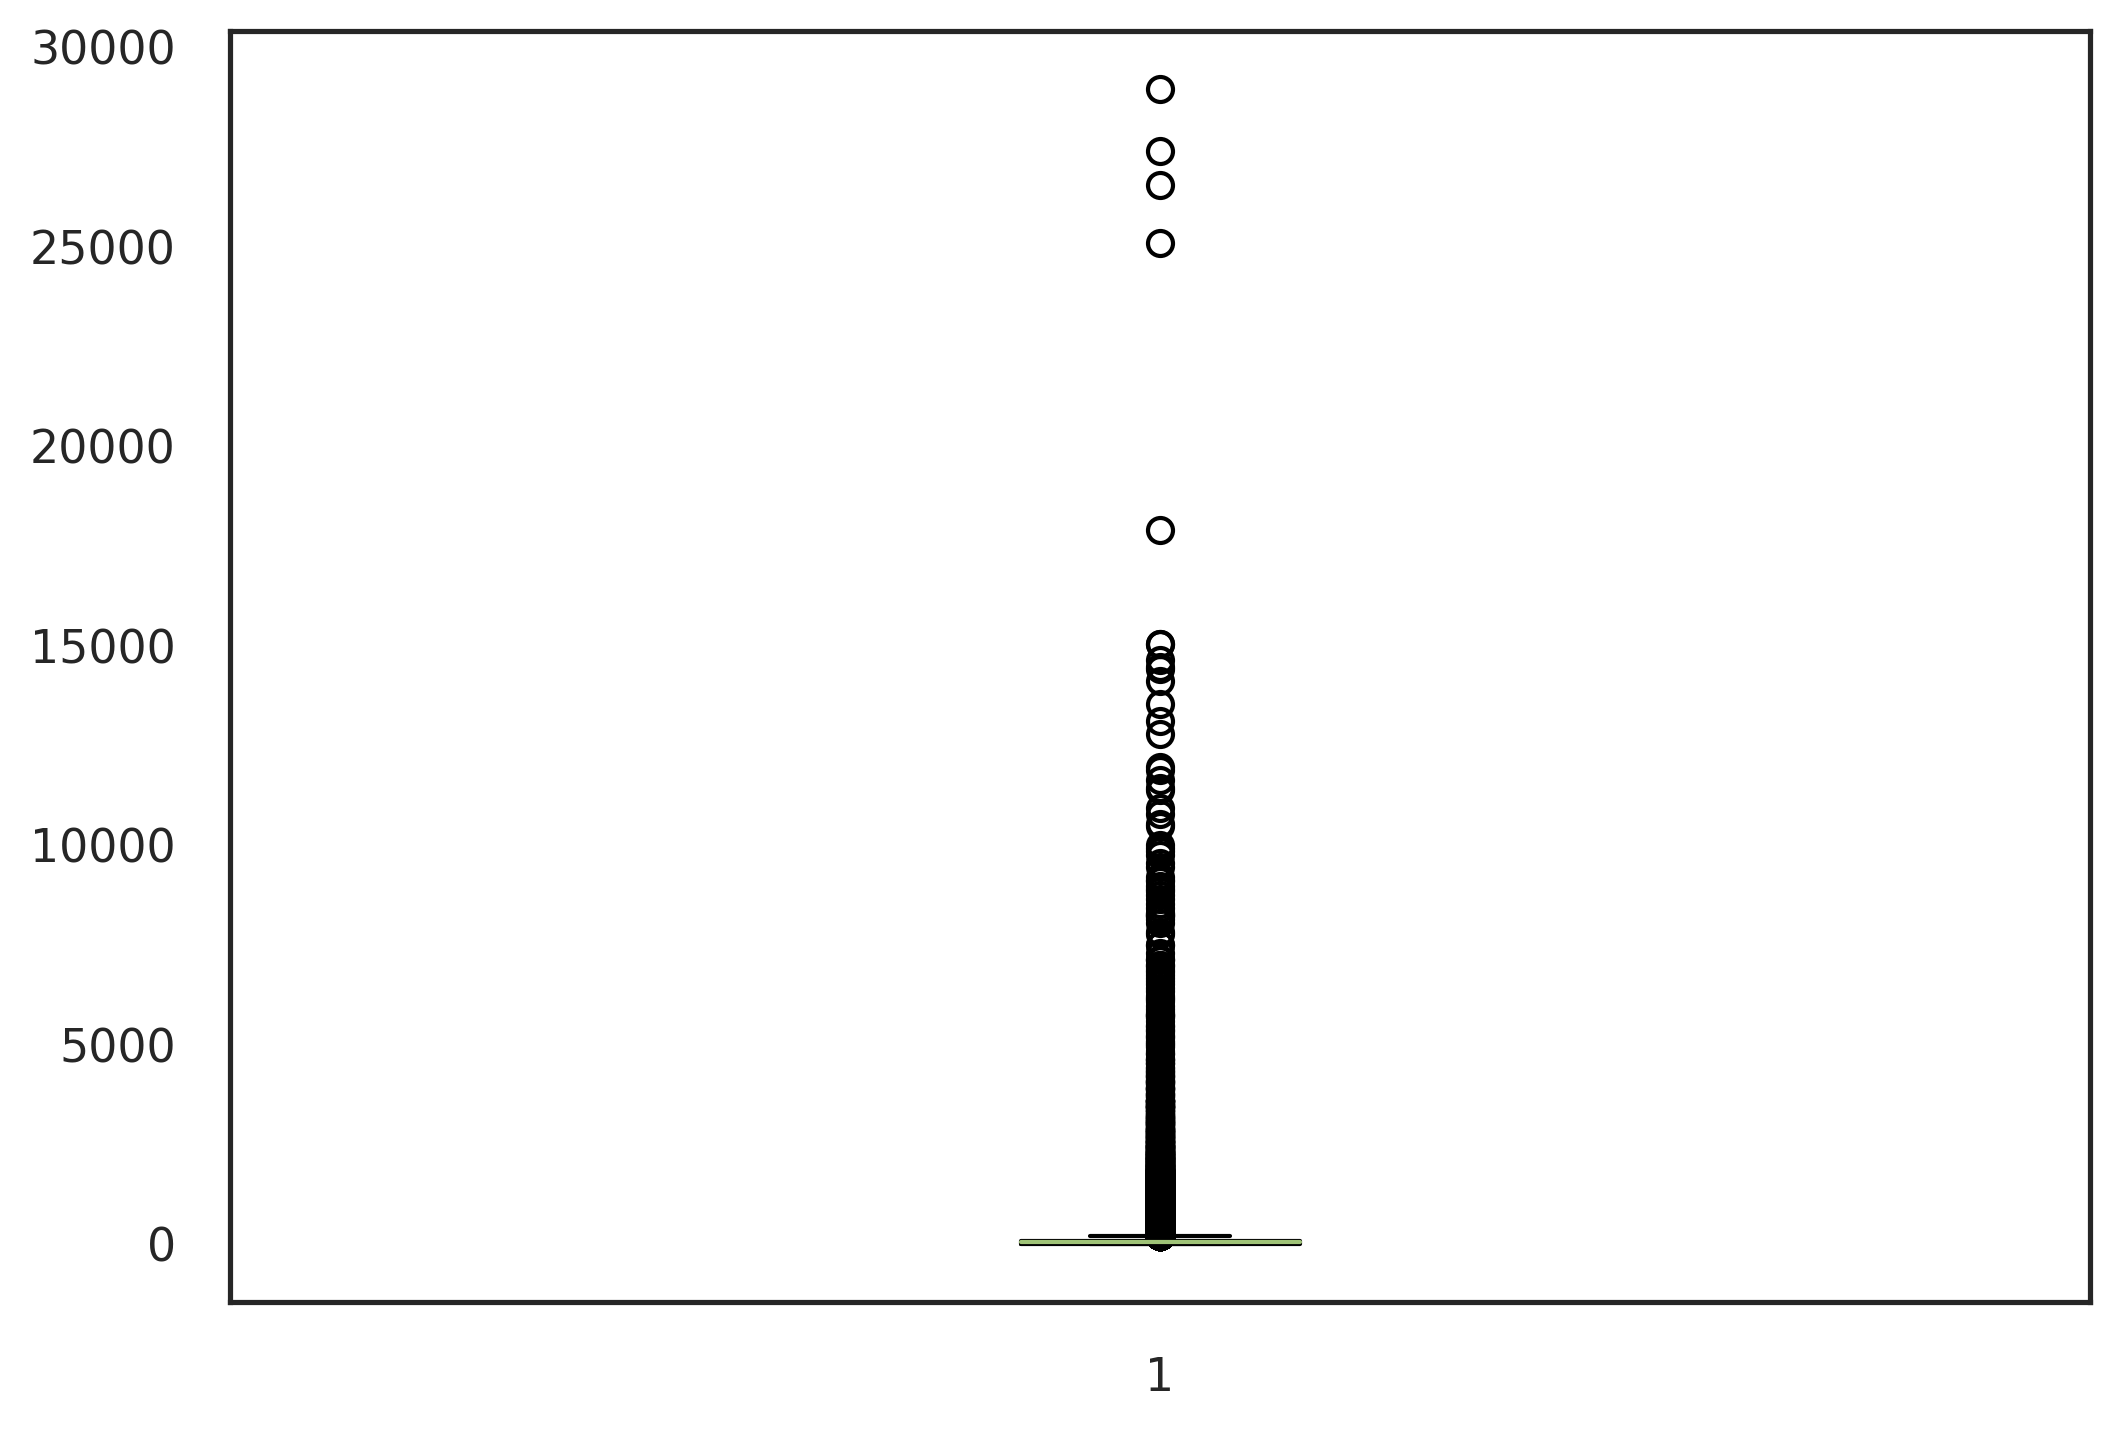

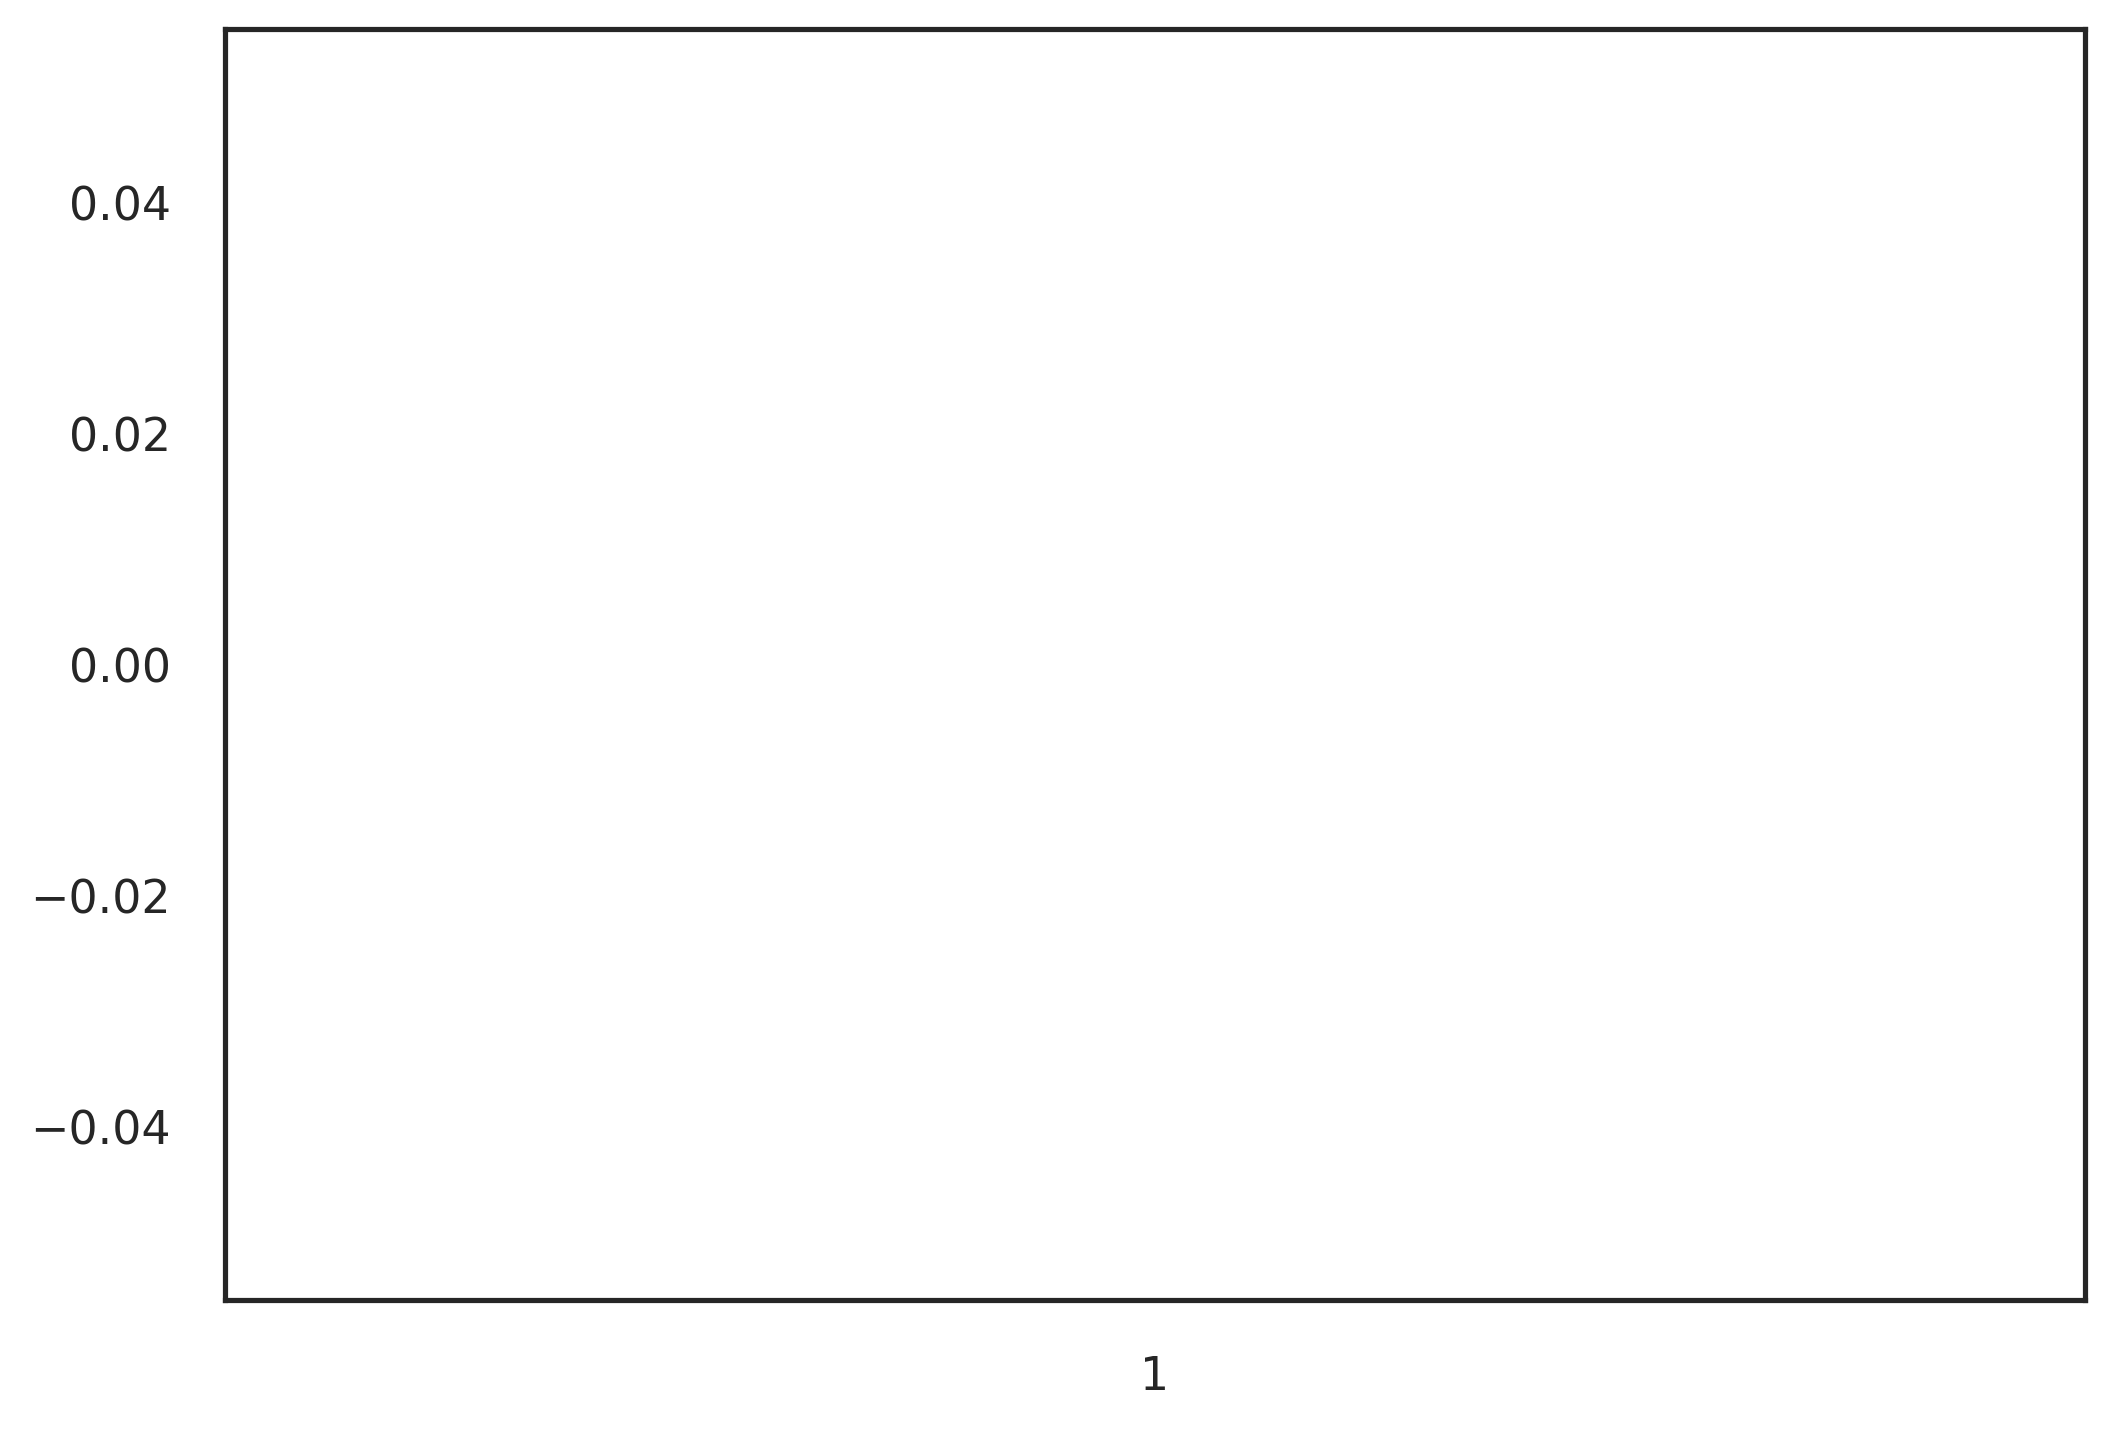

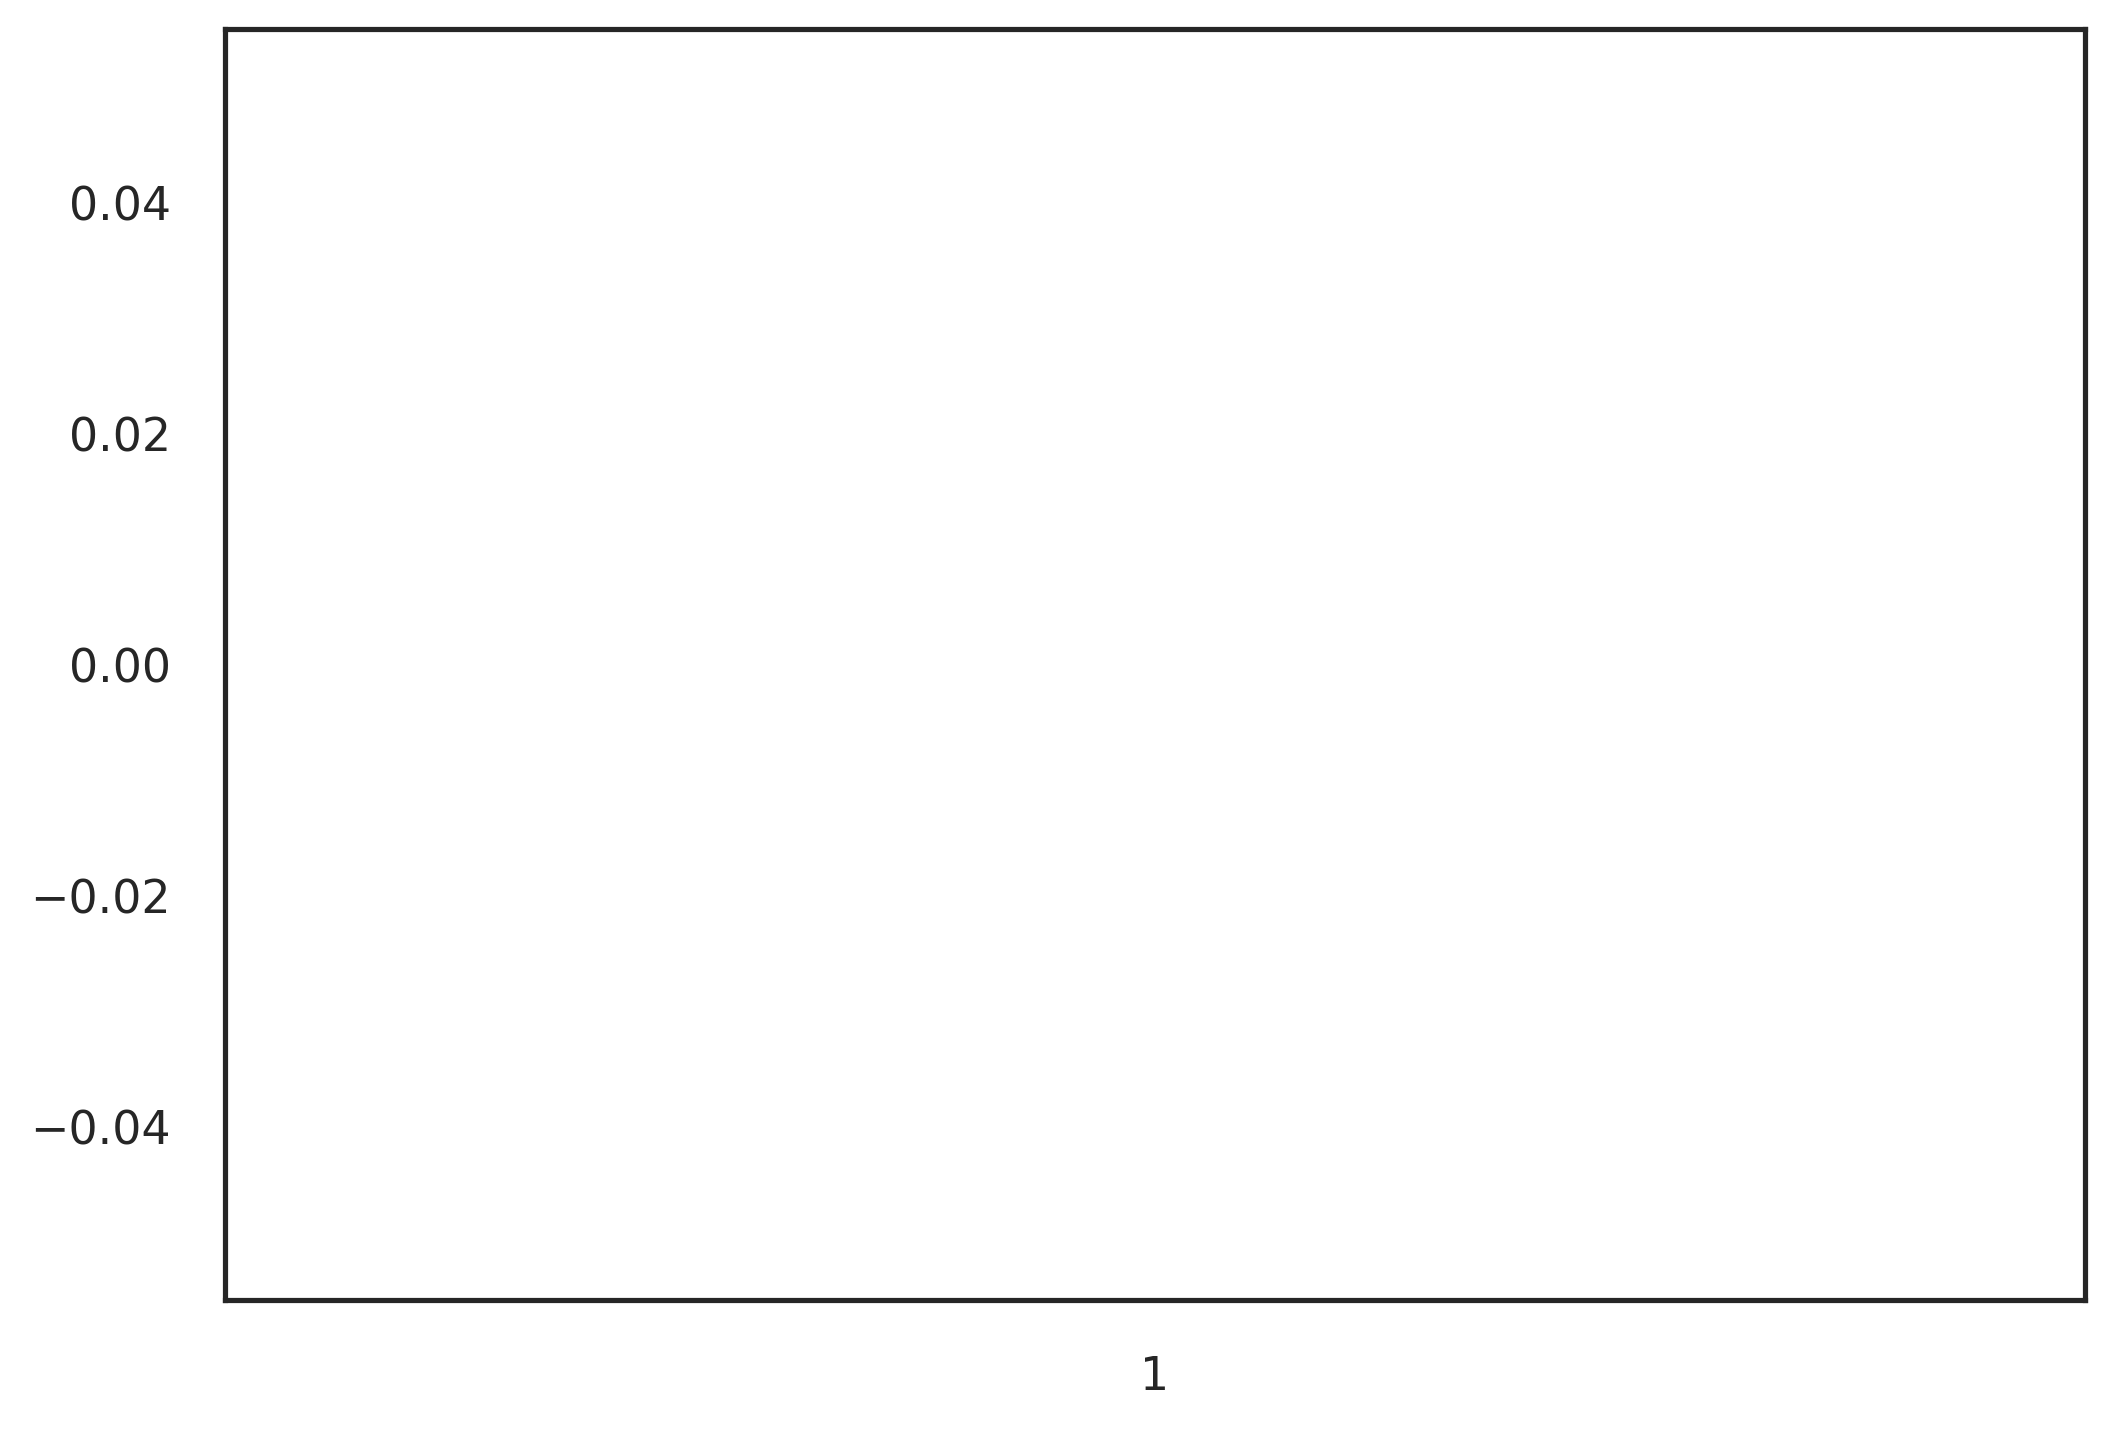

In [22]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

In [23]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 6, 7, 8, 9, 11, 12]
[0, 1, 3, 4, 5, 10]
Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'trans_date', 'trans_time'],
      dtype='object')


In [24]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
merchant
fraud_Kilback LLC                        0.003342
fraud_Cormier LLC                        0.002858
fraud_Schumm PLC                         0.002778
fraud_Boyer PLC                          0.002700
fraud_Dickinson Ltd                      0.002664
                                           ...   
fraud_Little-Gleichner                   0.000592
fraud_Kozey-McDermott                    0.000585
fraud_Reichert-Weissnat                  0.000583
fraud_Hodkiewicz, Prohaska and Paucek    0.000572
fraud_Hahn, Douglas and Schowalter       0.000564
Name: proportion, Length: 693, dtype: float64
**************************************************
category
category
gas_transport     0.101515
grocery_pos       0.095094
home              0.094950
shopping_pos      0.089997
kids_pets         0.087222
shopping_net      0.075147
entertainment     0.072483
food_dining       0.070805
personal_care     0.070204
health_fitness    0.066032
misc_pos          0.061490
misc_net          0.

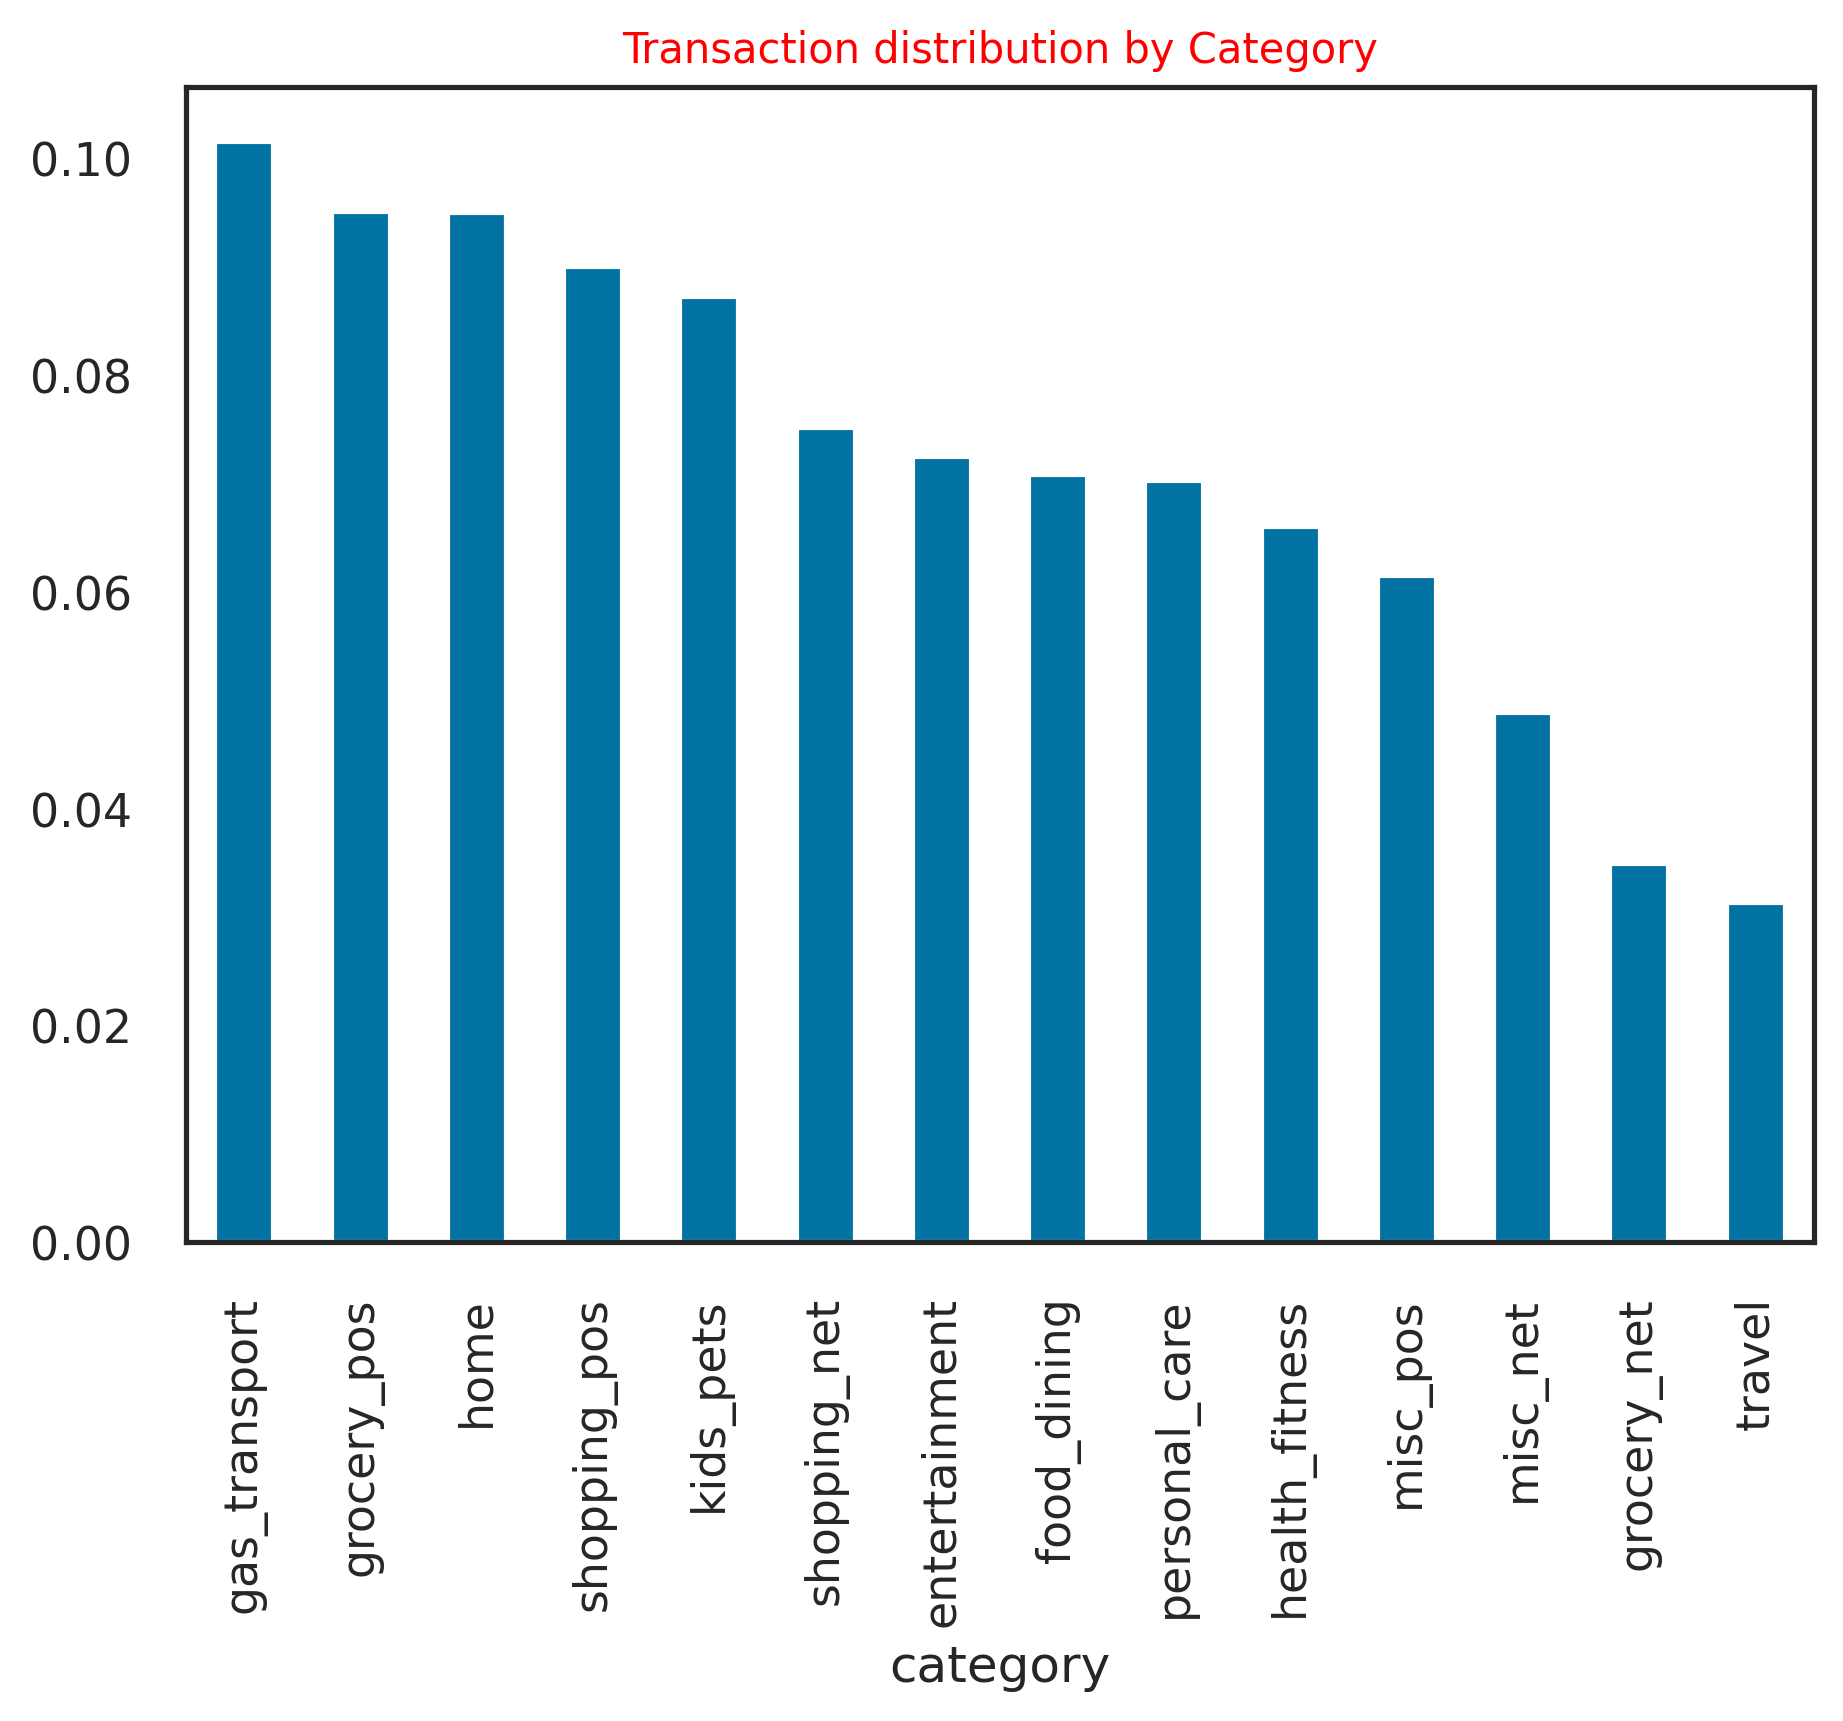

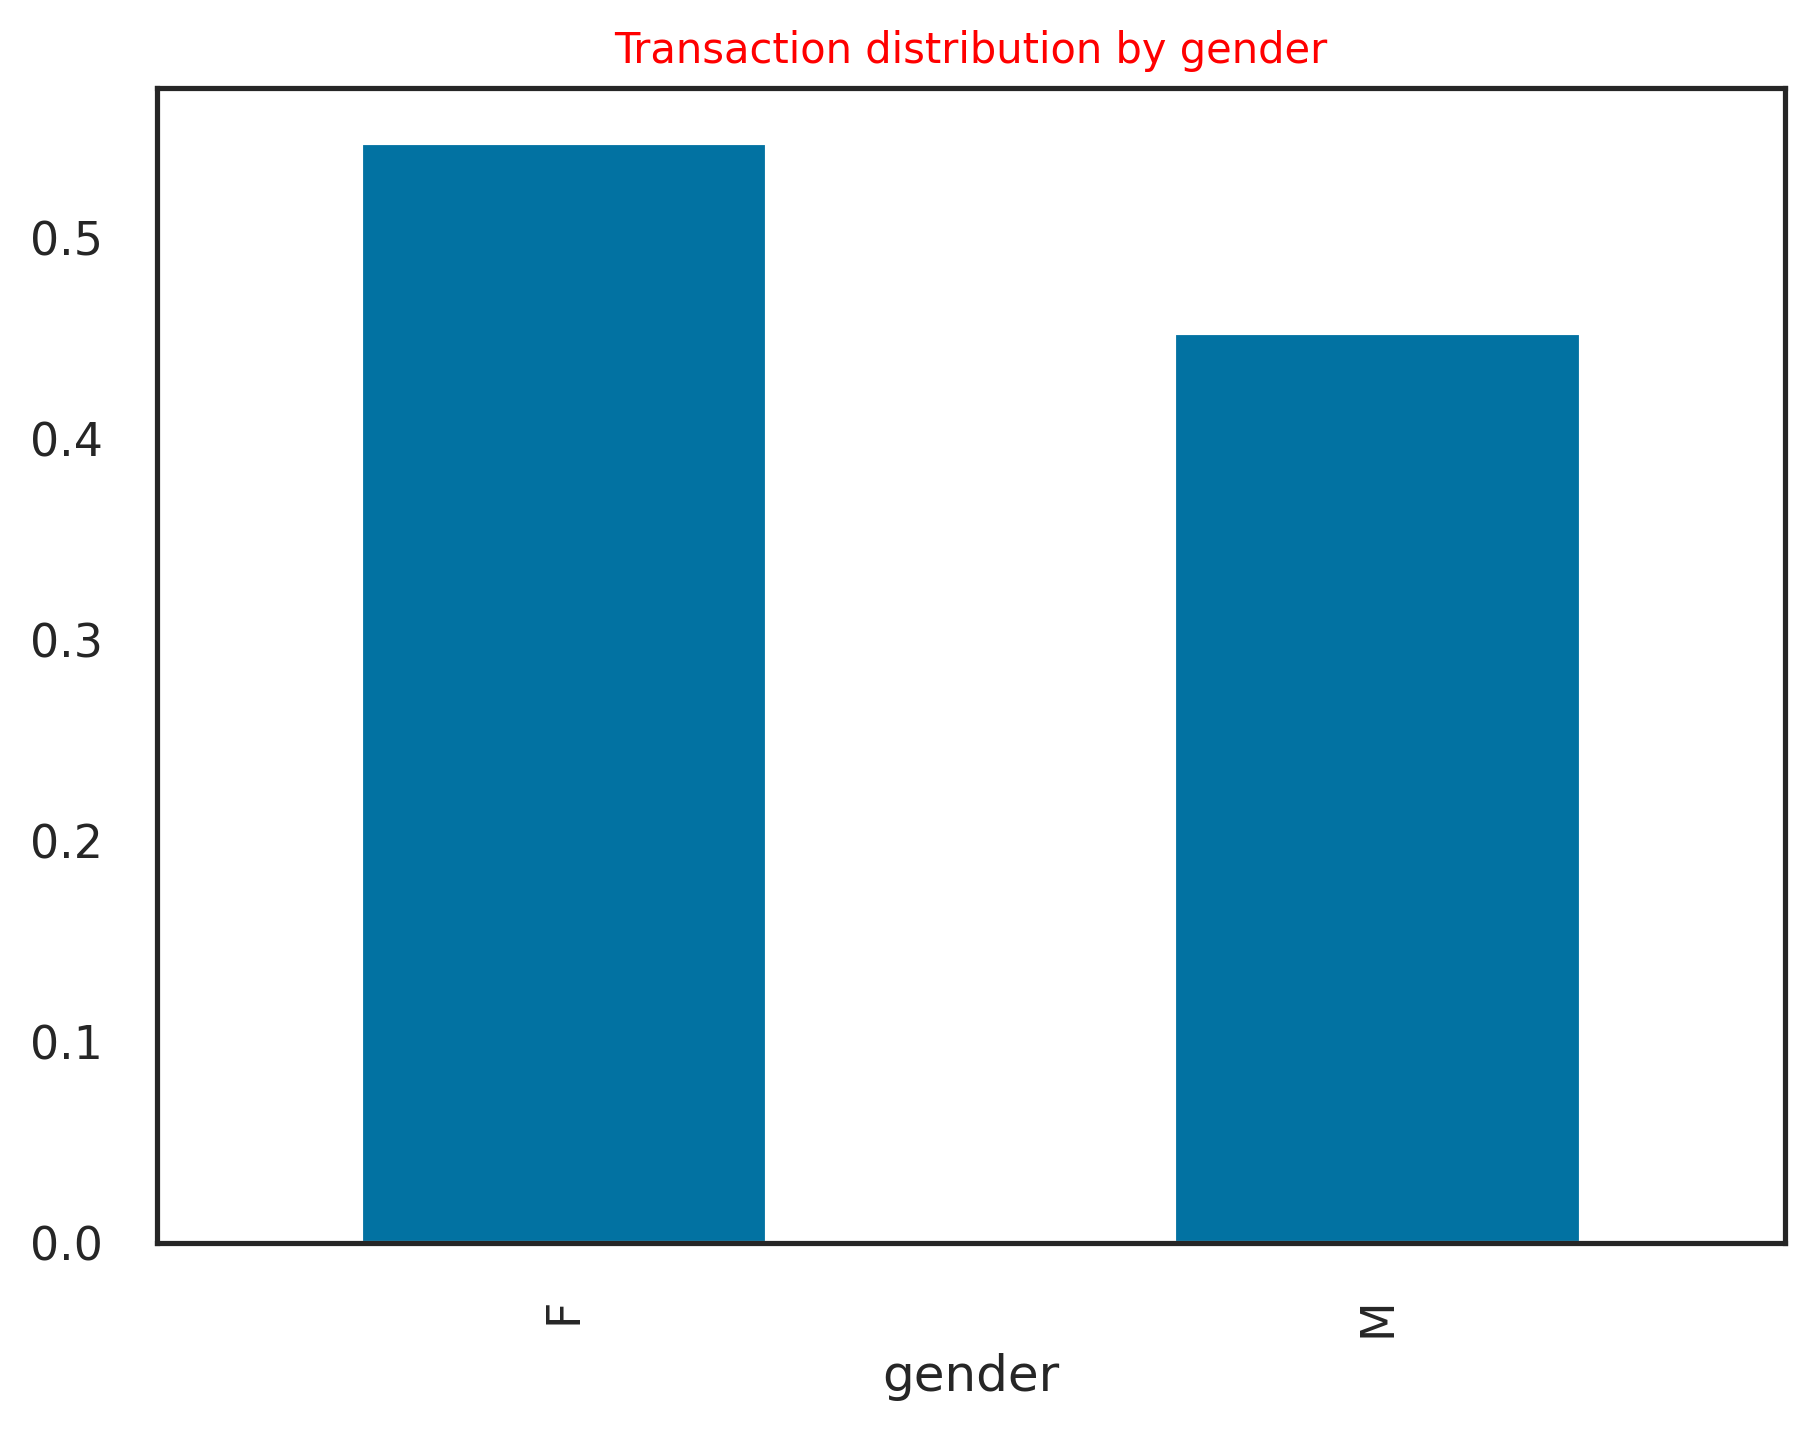

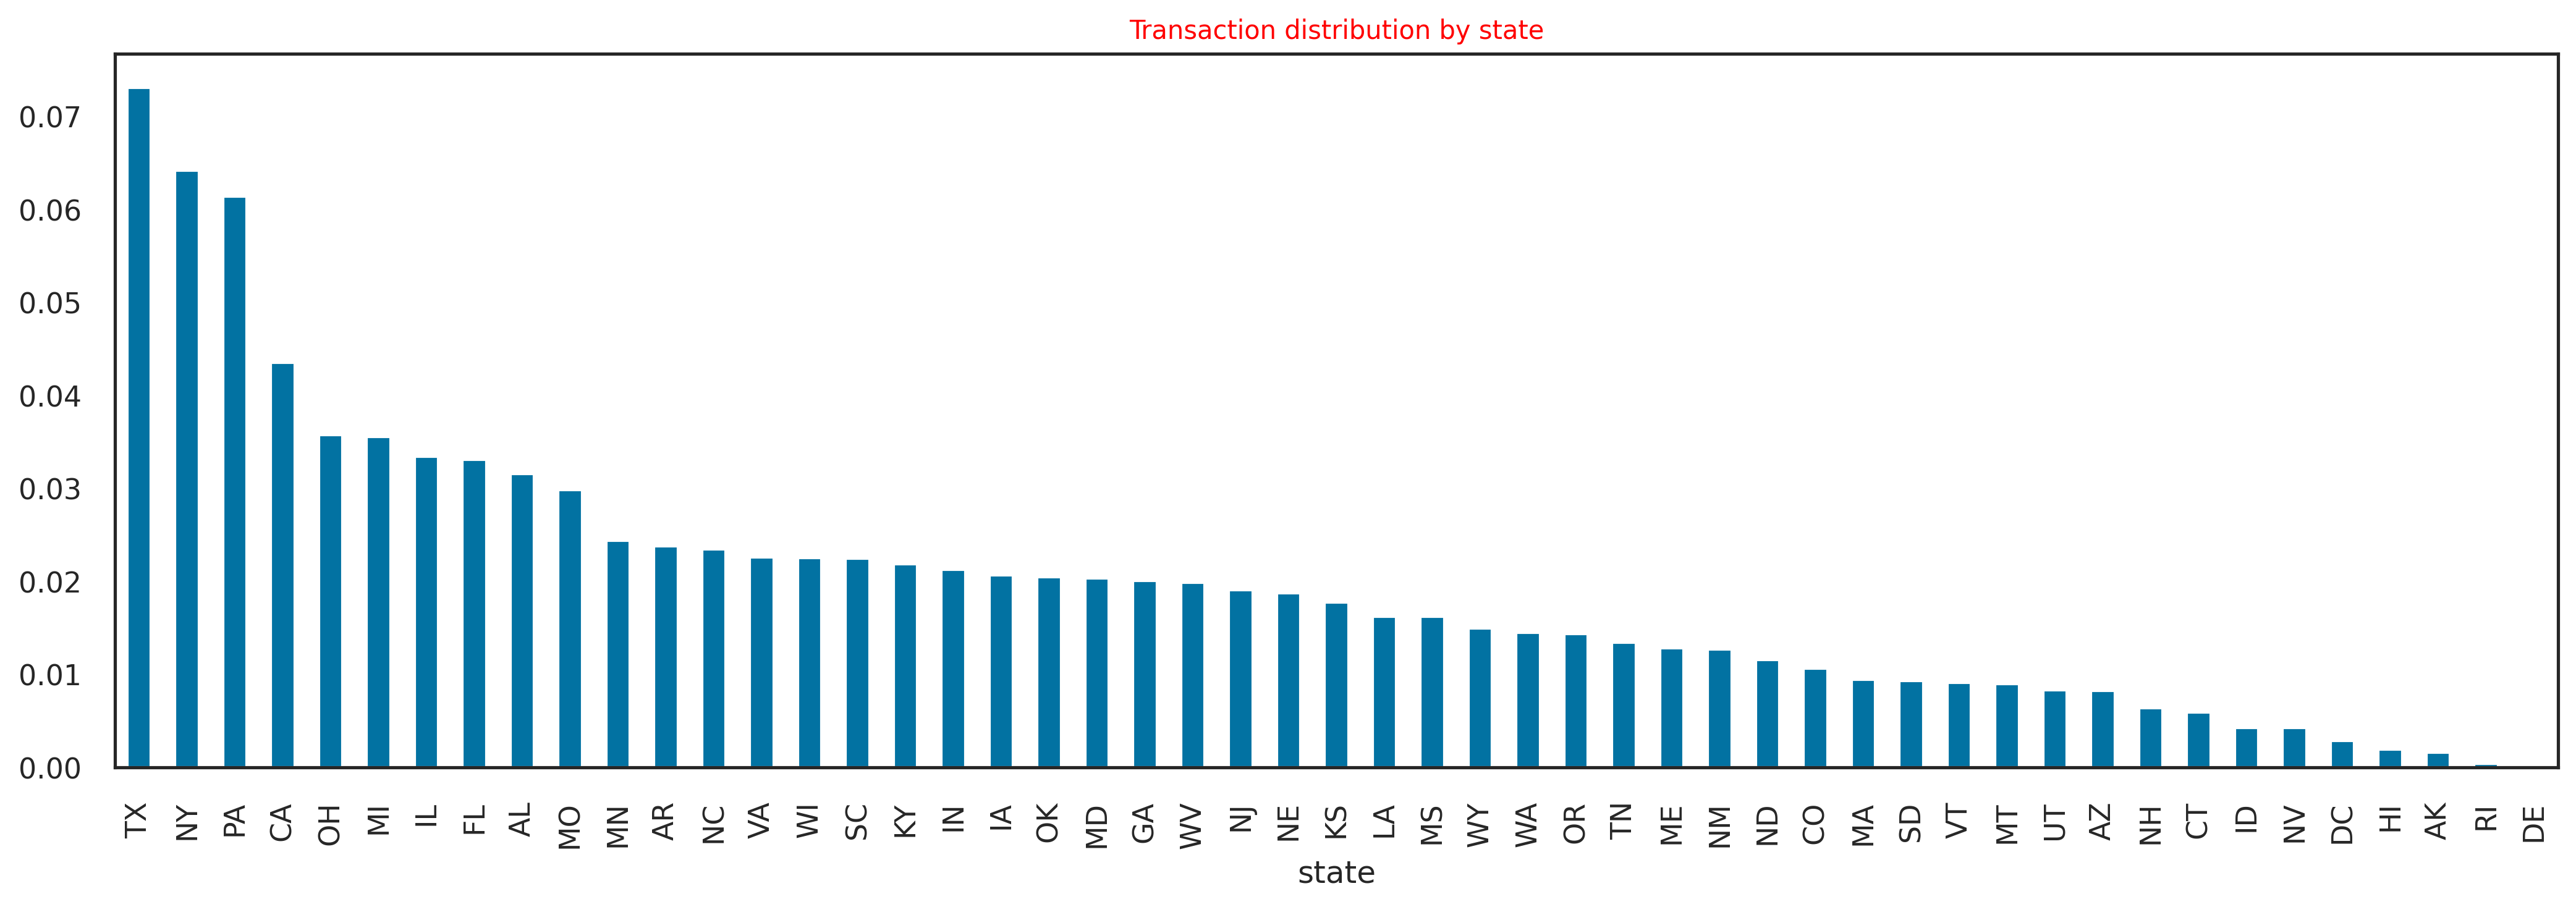

In [25]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

In [27]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852484 entries, 0 to 852483
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   merchant    852484 non-null  object        
 1   category    852484 non-null  object        
 2   amt         852484 non-null  float64       
 3   gender      852484 non-null  object        
 4   city        852483 non-null  object        
 5   state       852483 non-null  object        
 6   zip         852483 non-null  float64       
 7   lat         852483 non-null  float64       
 8   long        852483 non-null  float64       
 9   city_pop    852483 non-null  float64       
 10  job         852483 non-null  object        
 11  dob         852483 non-null  datetime64[ns]
 12  unix_time   852483 non-null  float64       
 13  merch_lat   852483 non-null  float64       
 14  merch_long  852483 non-null  float64       
 15  is_fraud    852483 non-null  float64       
 16  ag

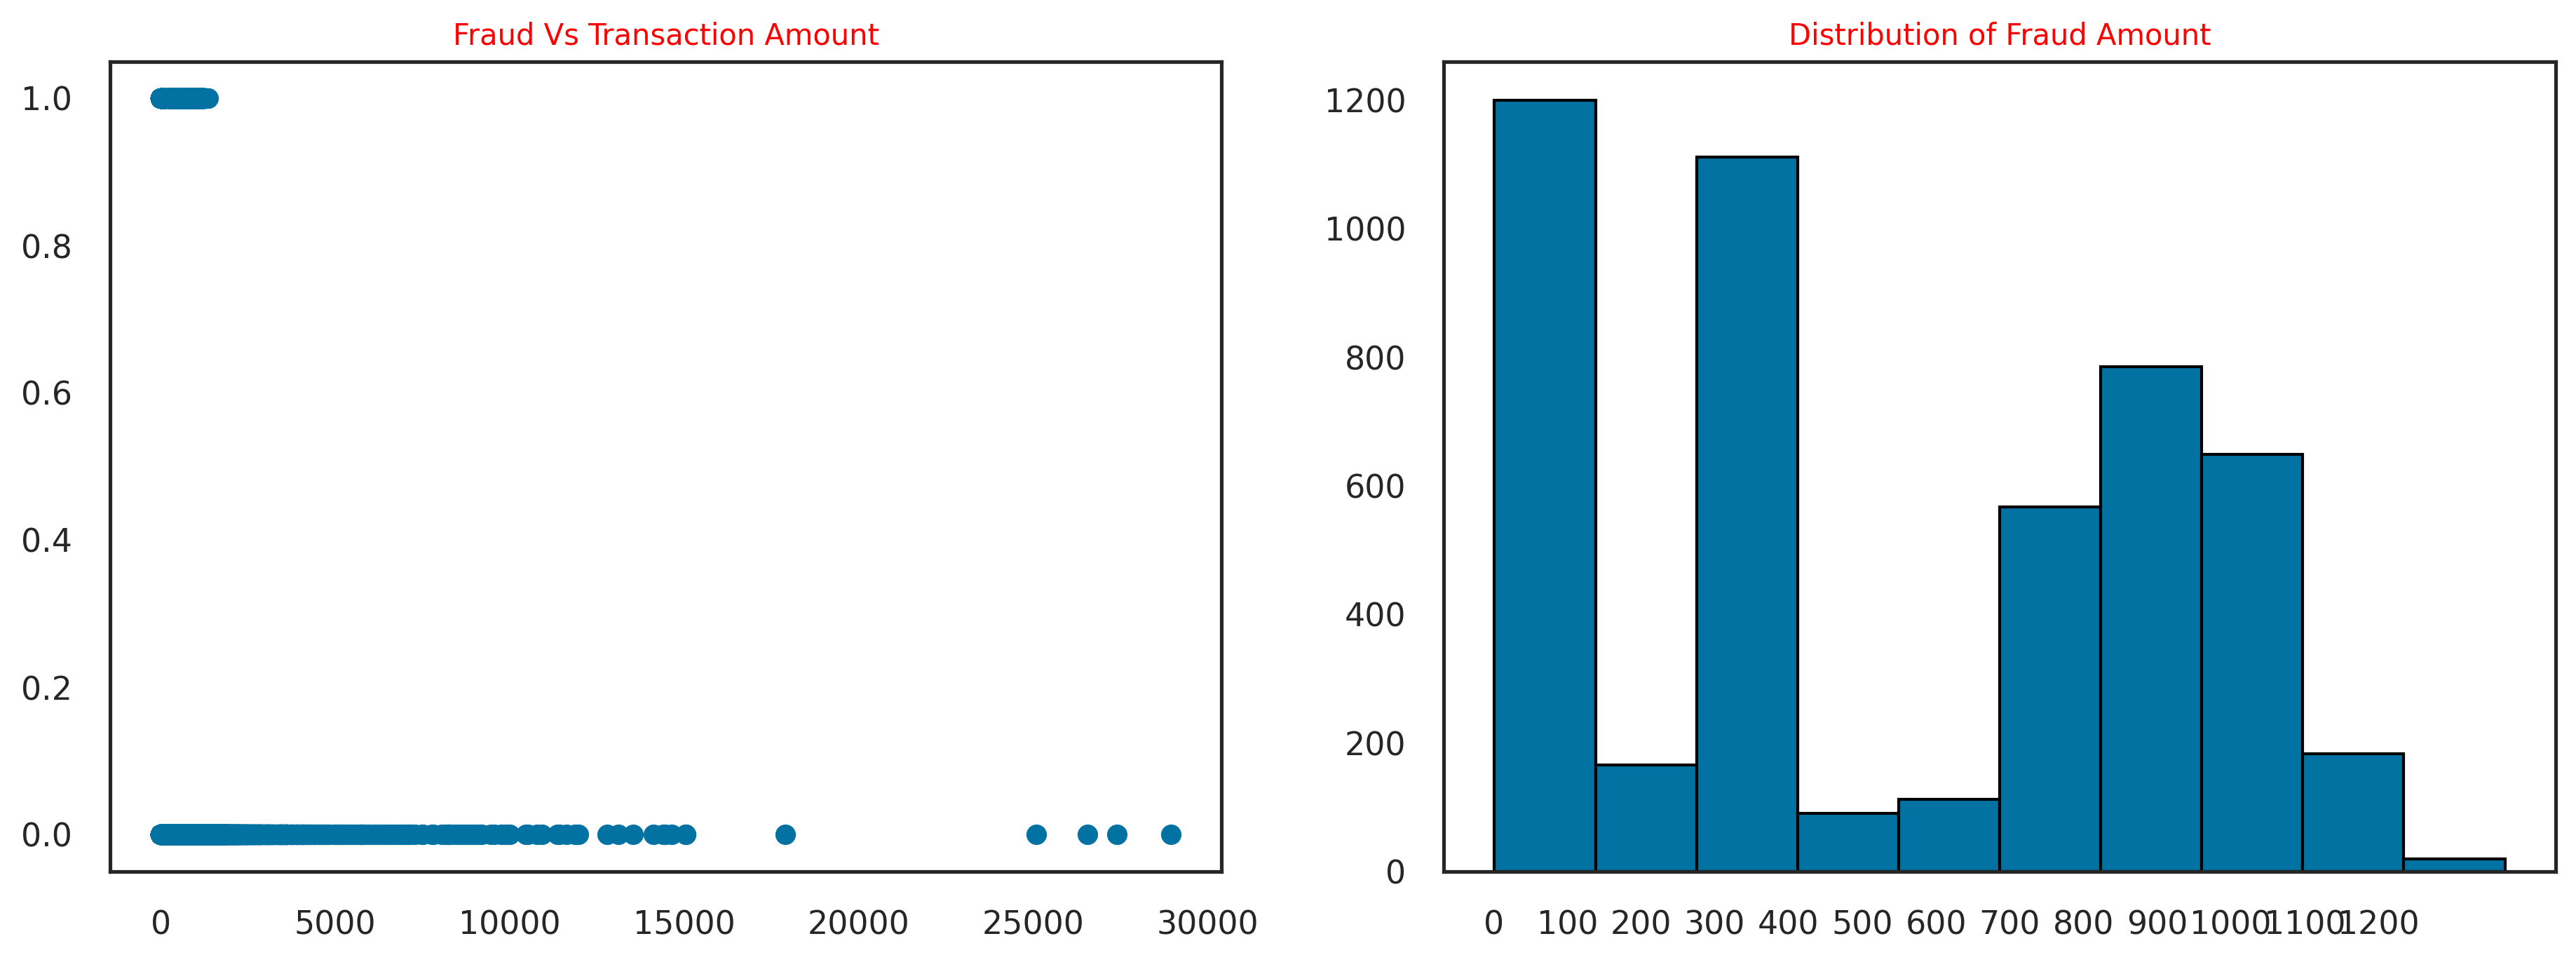

In [28]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

In [29]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 1197
fraud_Abbott-Steuber                1140
fraud_Abernathy and Sons            1157
fraud_Abshire PLC                   1223
fraud_Adams, Kovacek and Kuhlman     610
Name: is_fraud, dtype: int64

In [30]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

merchant
fraud_Kilback LLC       35
fraud_Hudson-Ratke      34
fraud_Cormier LLC       31
fraud_Kuhn LLC          31
fraud_Kiehn-Emmerich    31
Name: count, dtype: int64

In [31]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

merchant
fraud_Herman, Treutel and Dickens     2.641056
fraud_Kozey-Boehm                     2.300740
fraud_Gleason-Macejkovic              2.274450
fraud_Streich, Dietrich and Barton    2.267396
fraud_Boyer-Reichert                  2.191558
                                        ...   
fraud_Turner LLC                           NaN
fraud_Veum-Koelpin                         NaN
fraud_Wiegand-Lowe                         NaN
fraud_Will Ltd                             NaN
fraud_Windler LLC                          NaN
Length: 693, dtype: float64

In [32]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [33]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

city
Crouse         100.0
Orange Park    100.0
Medford        100.0
Irvington      100.0
Kaktovik       100.0
dtype: float64

In [34]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

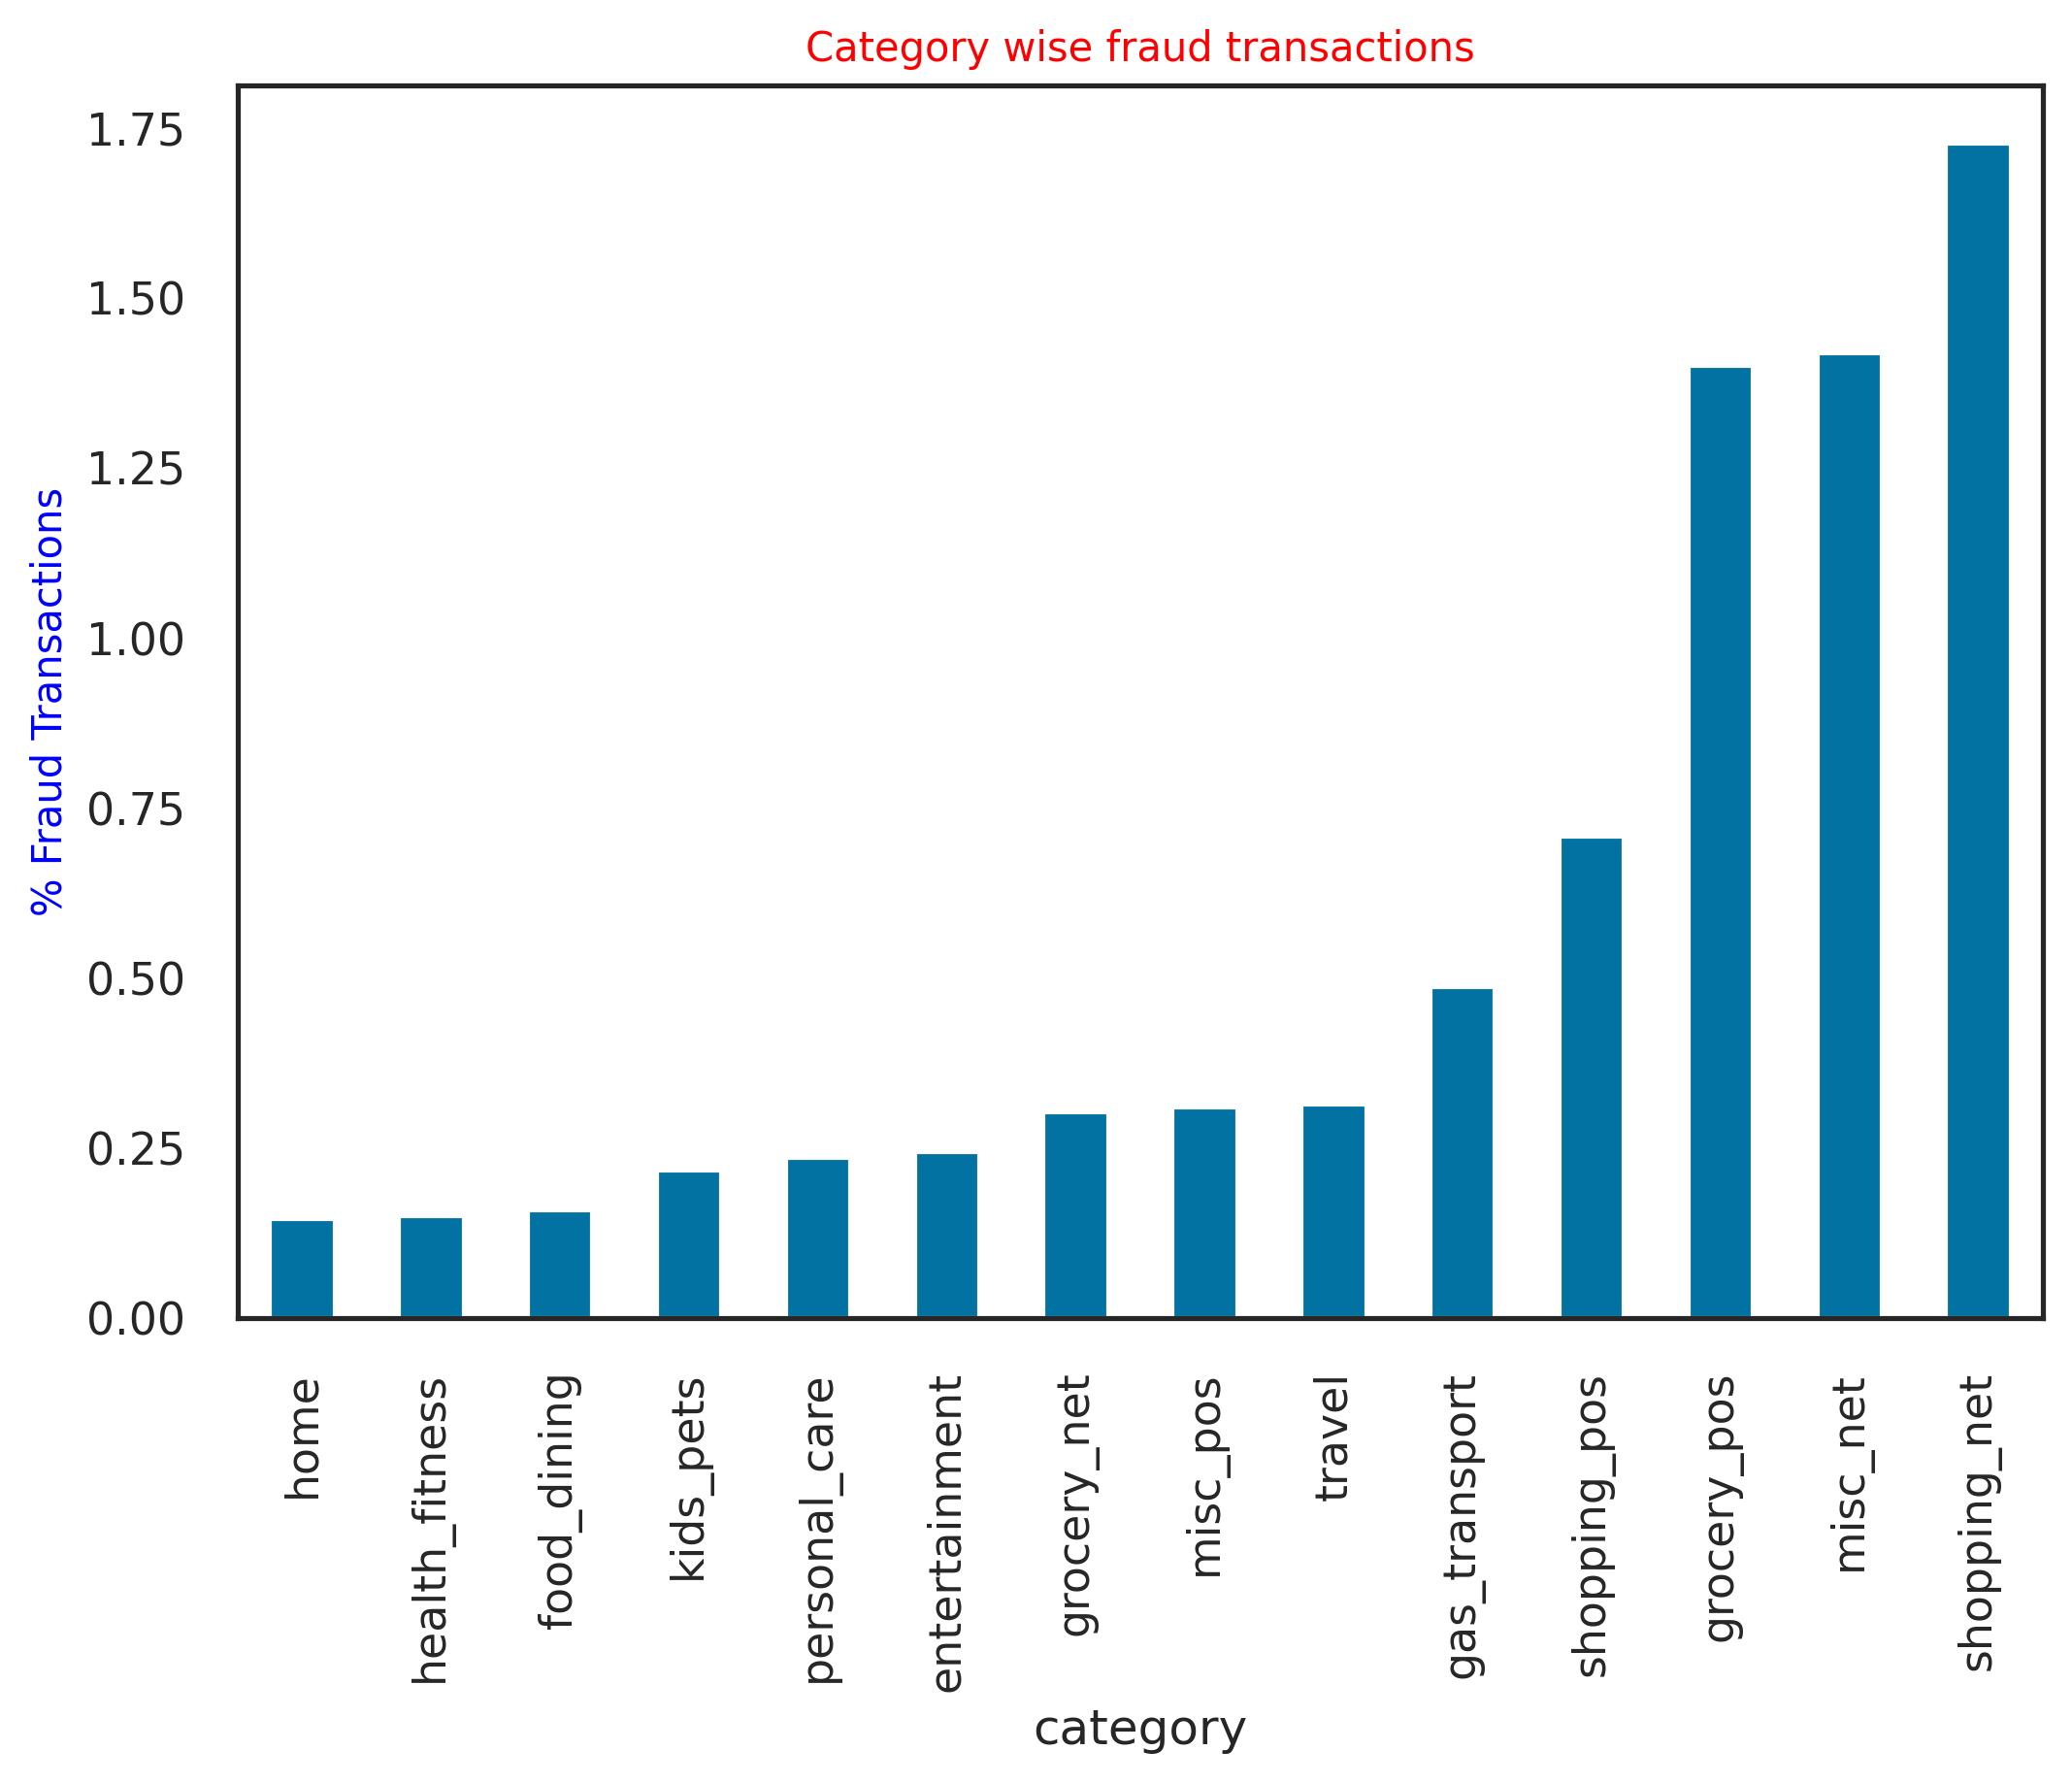

In [35]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [36]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

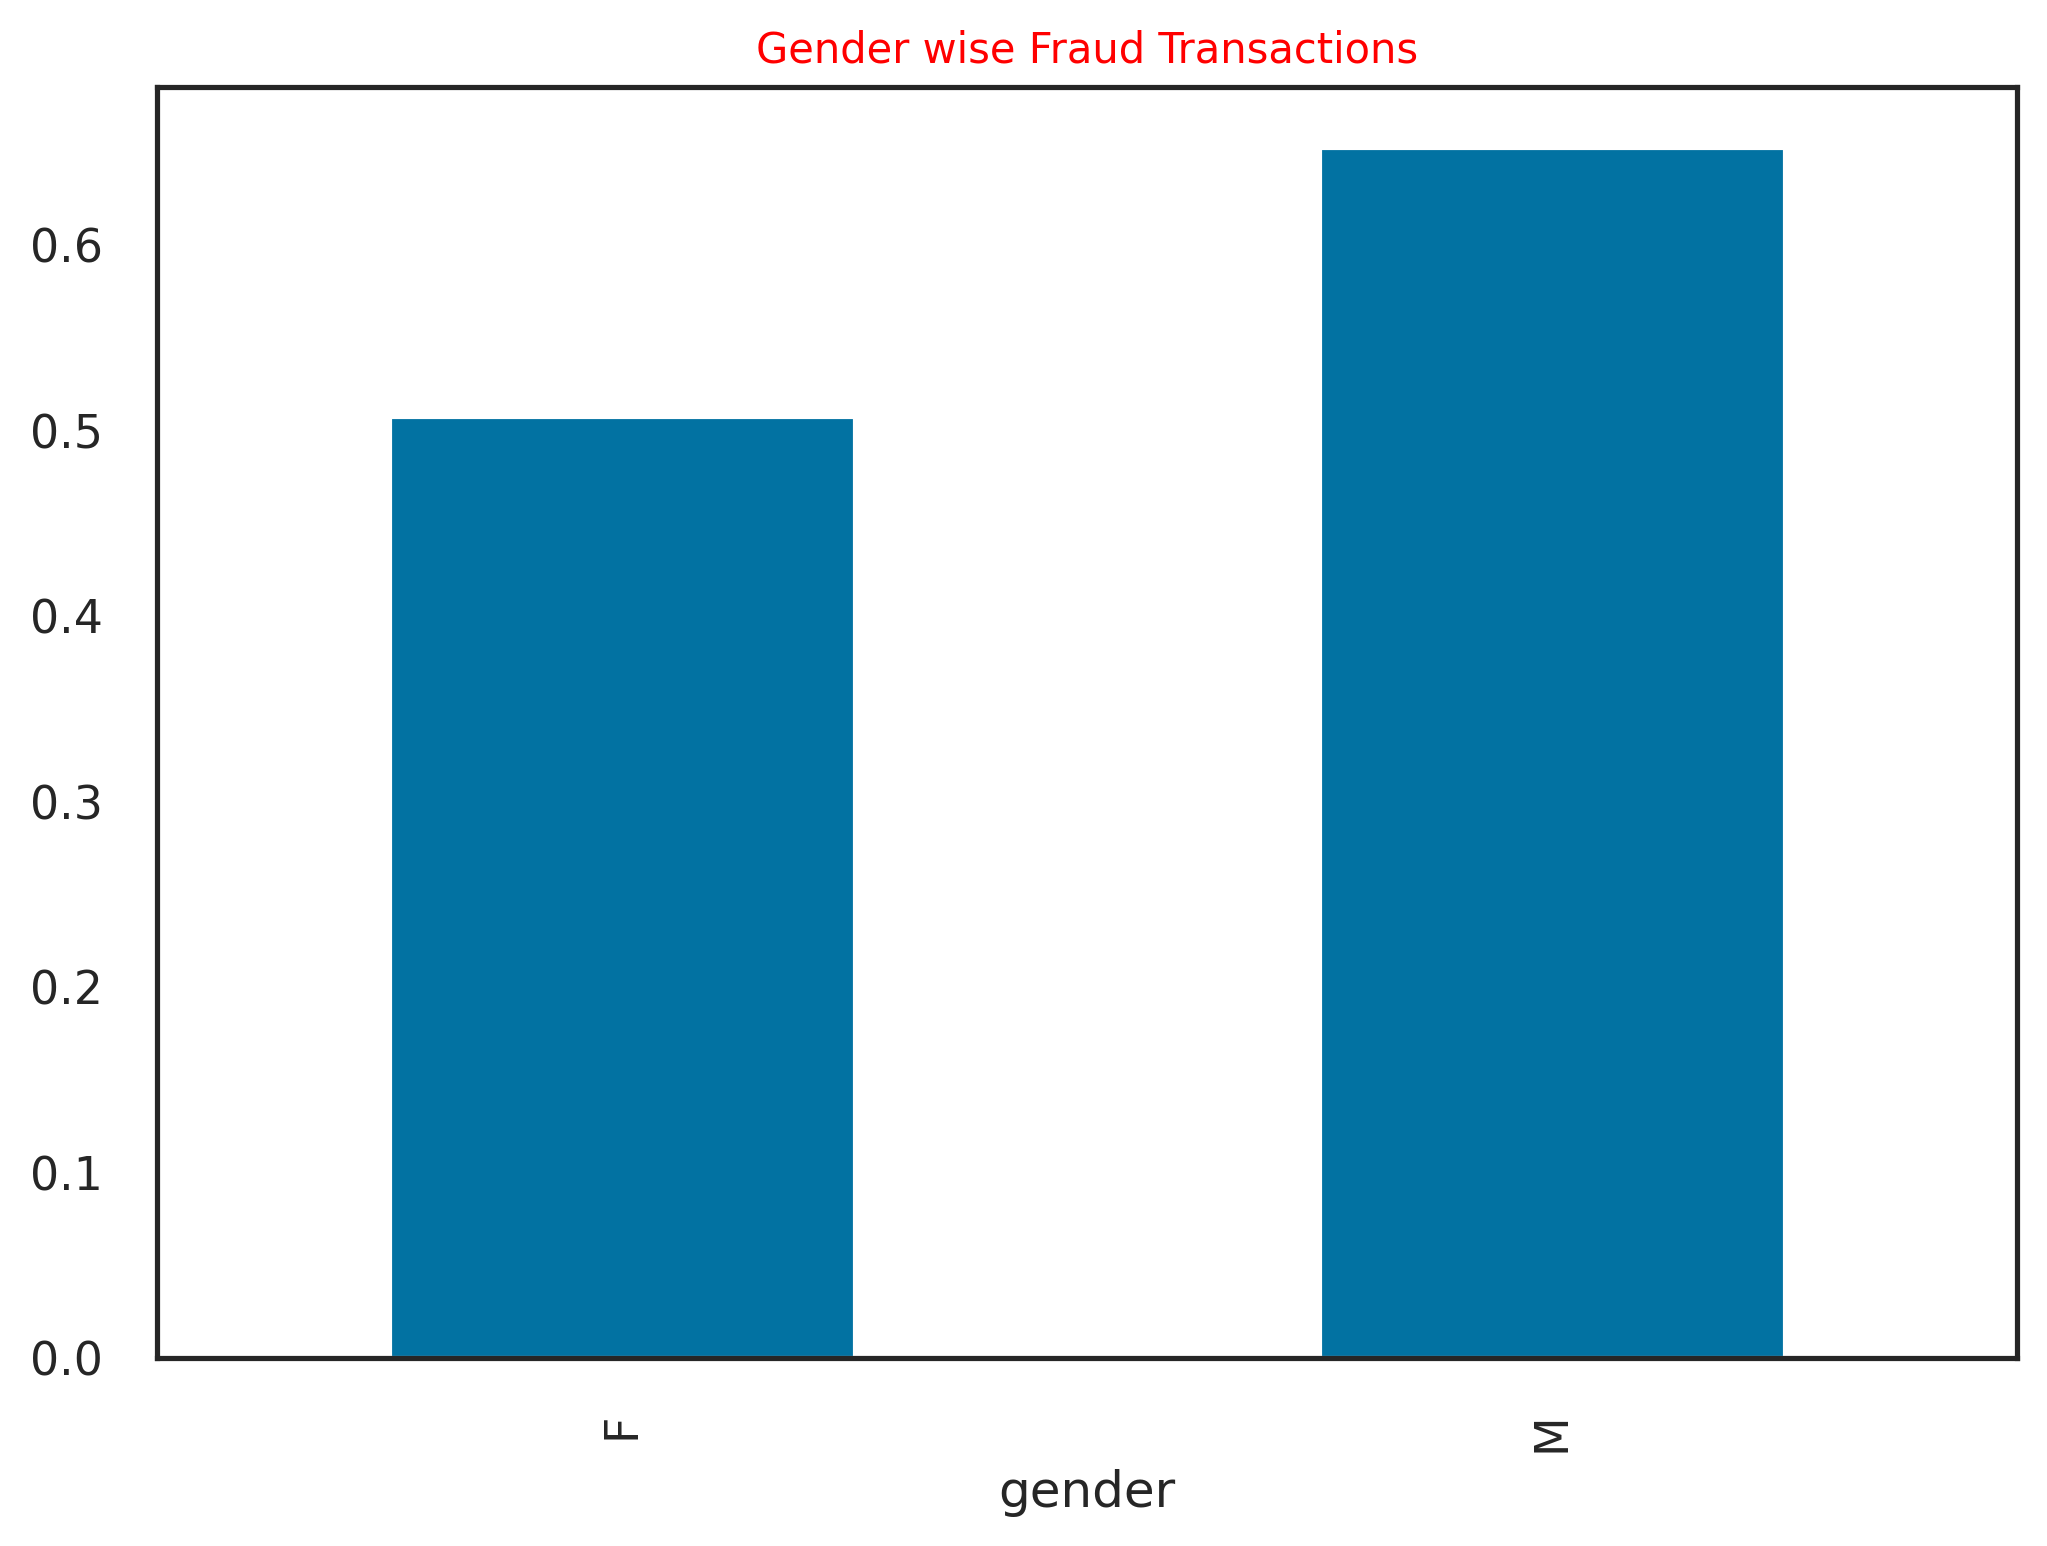

In [37]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [38]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

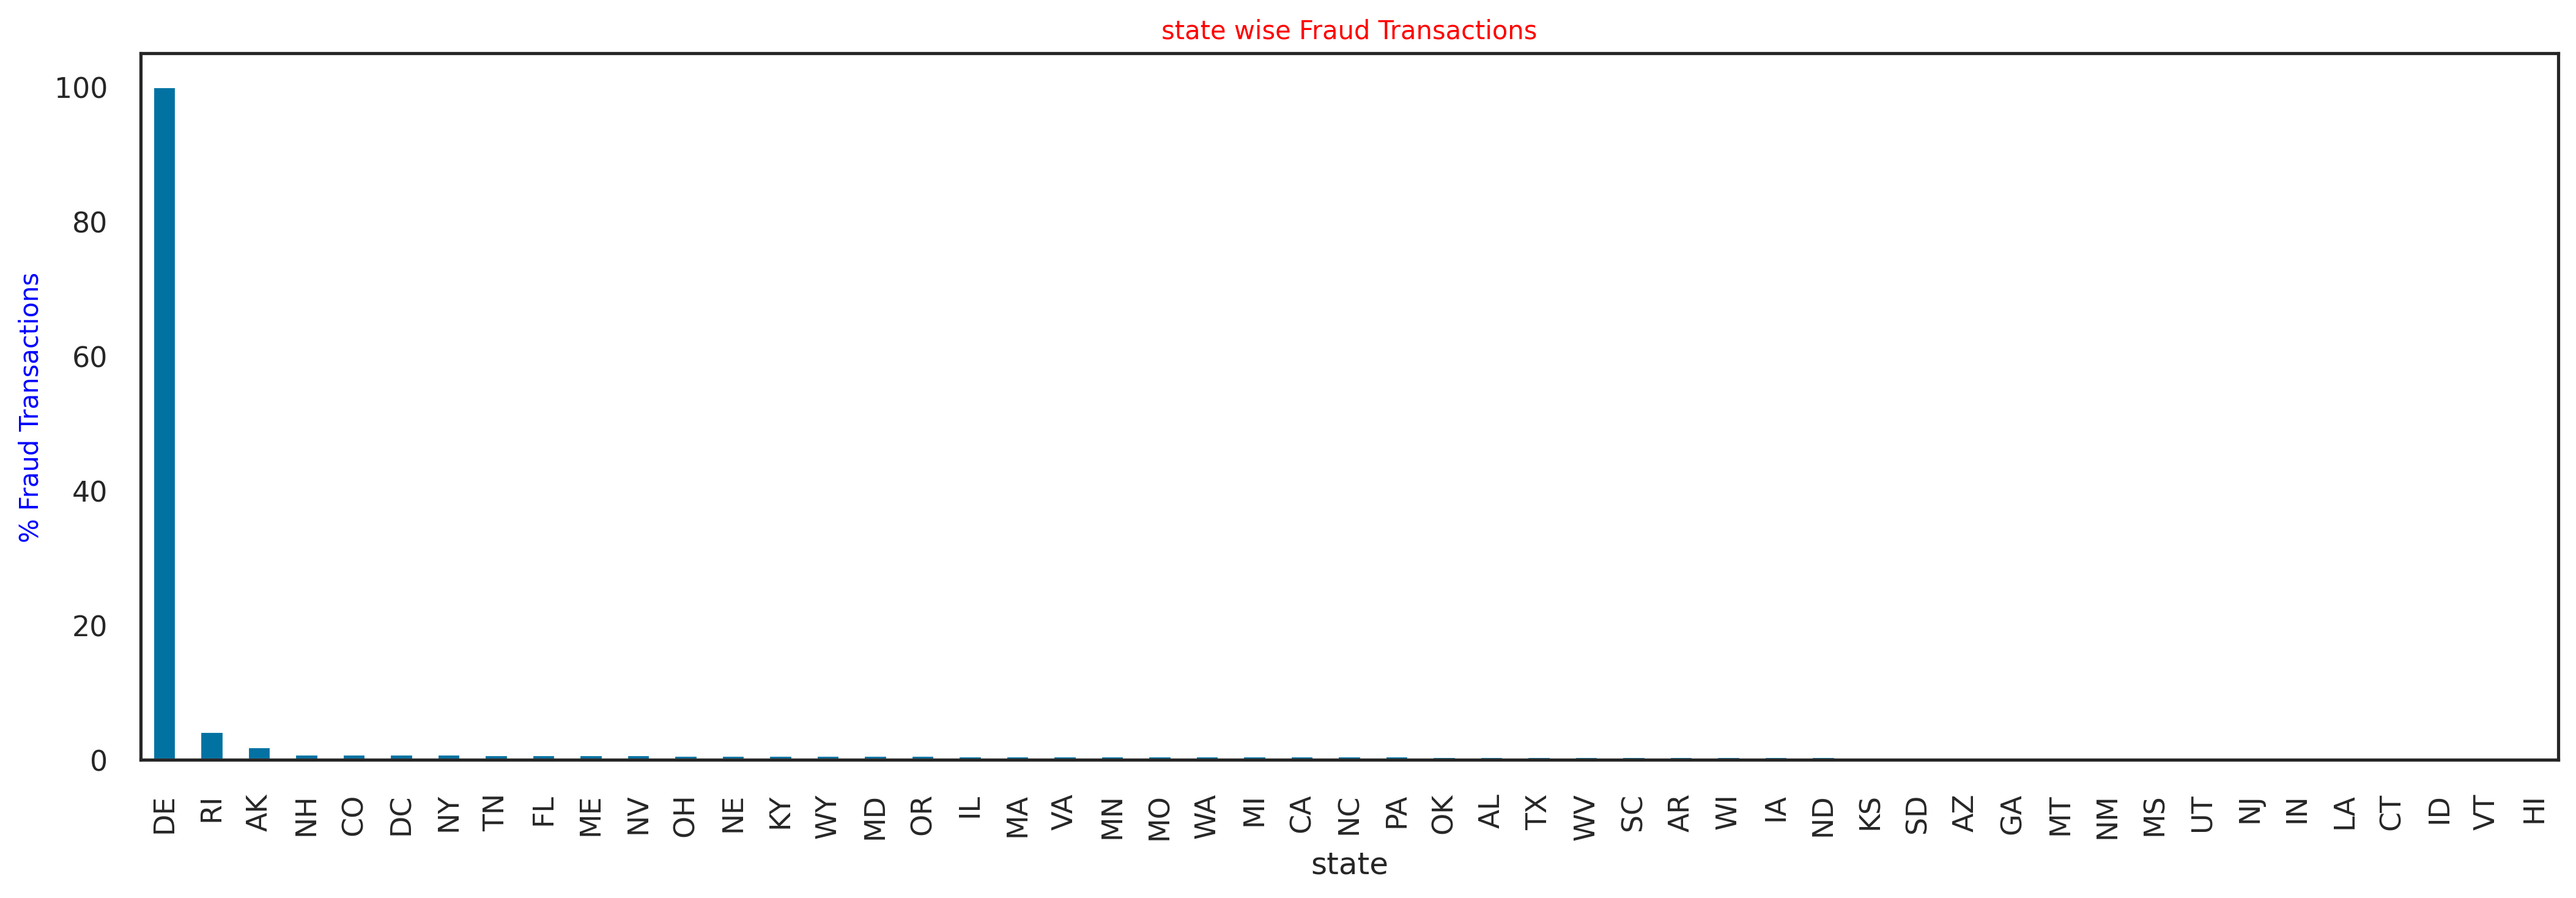

In [39]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [40]:
fraud_perc.sort_values(ascending=False).head()

state
DE    100.000000
RI      4.249292
AK      1.927195
NH      0.899908
CO      0.870523
dtype: float64

In [41]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [42]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

job
Dancer                               100.000000
Careers adviser                      100.000000
Broadcast journalist                 100.000000
Industrial buyer                     100.000000
Contracting civil engineer           100.000000
Armed forces technical officer       100.000000
Sales promotion account executive    100.000000
Accountant, chartered                100.000000
Information officer                  100.000000
Ship broker                          100.000000
Air traffic controller               100.000000
Forest/woodland manager              100.000000
Engineer, site                       100.000000
Personnel officer                    100.000000
Veterinary surgeon                   100.000000
Lawyer                                 7.608696
Community development worker           6.043956
TEFL teacher                           6.043956
Clinical cytogeneticist                5.113636
Geneticist, molecular                  4.494382
dtype: float64

In [43]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

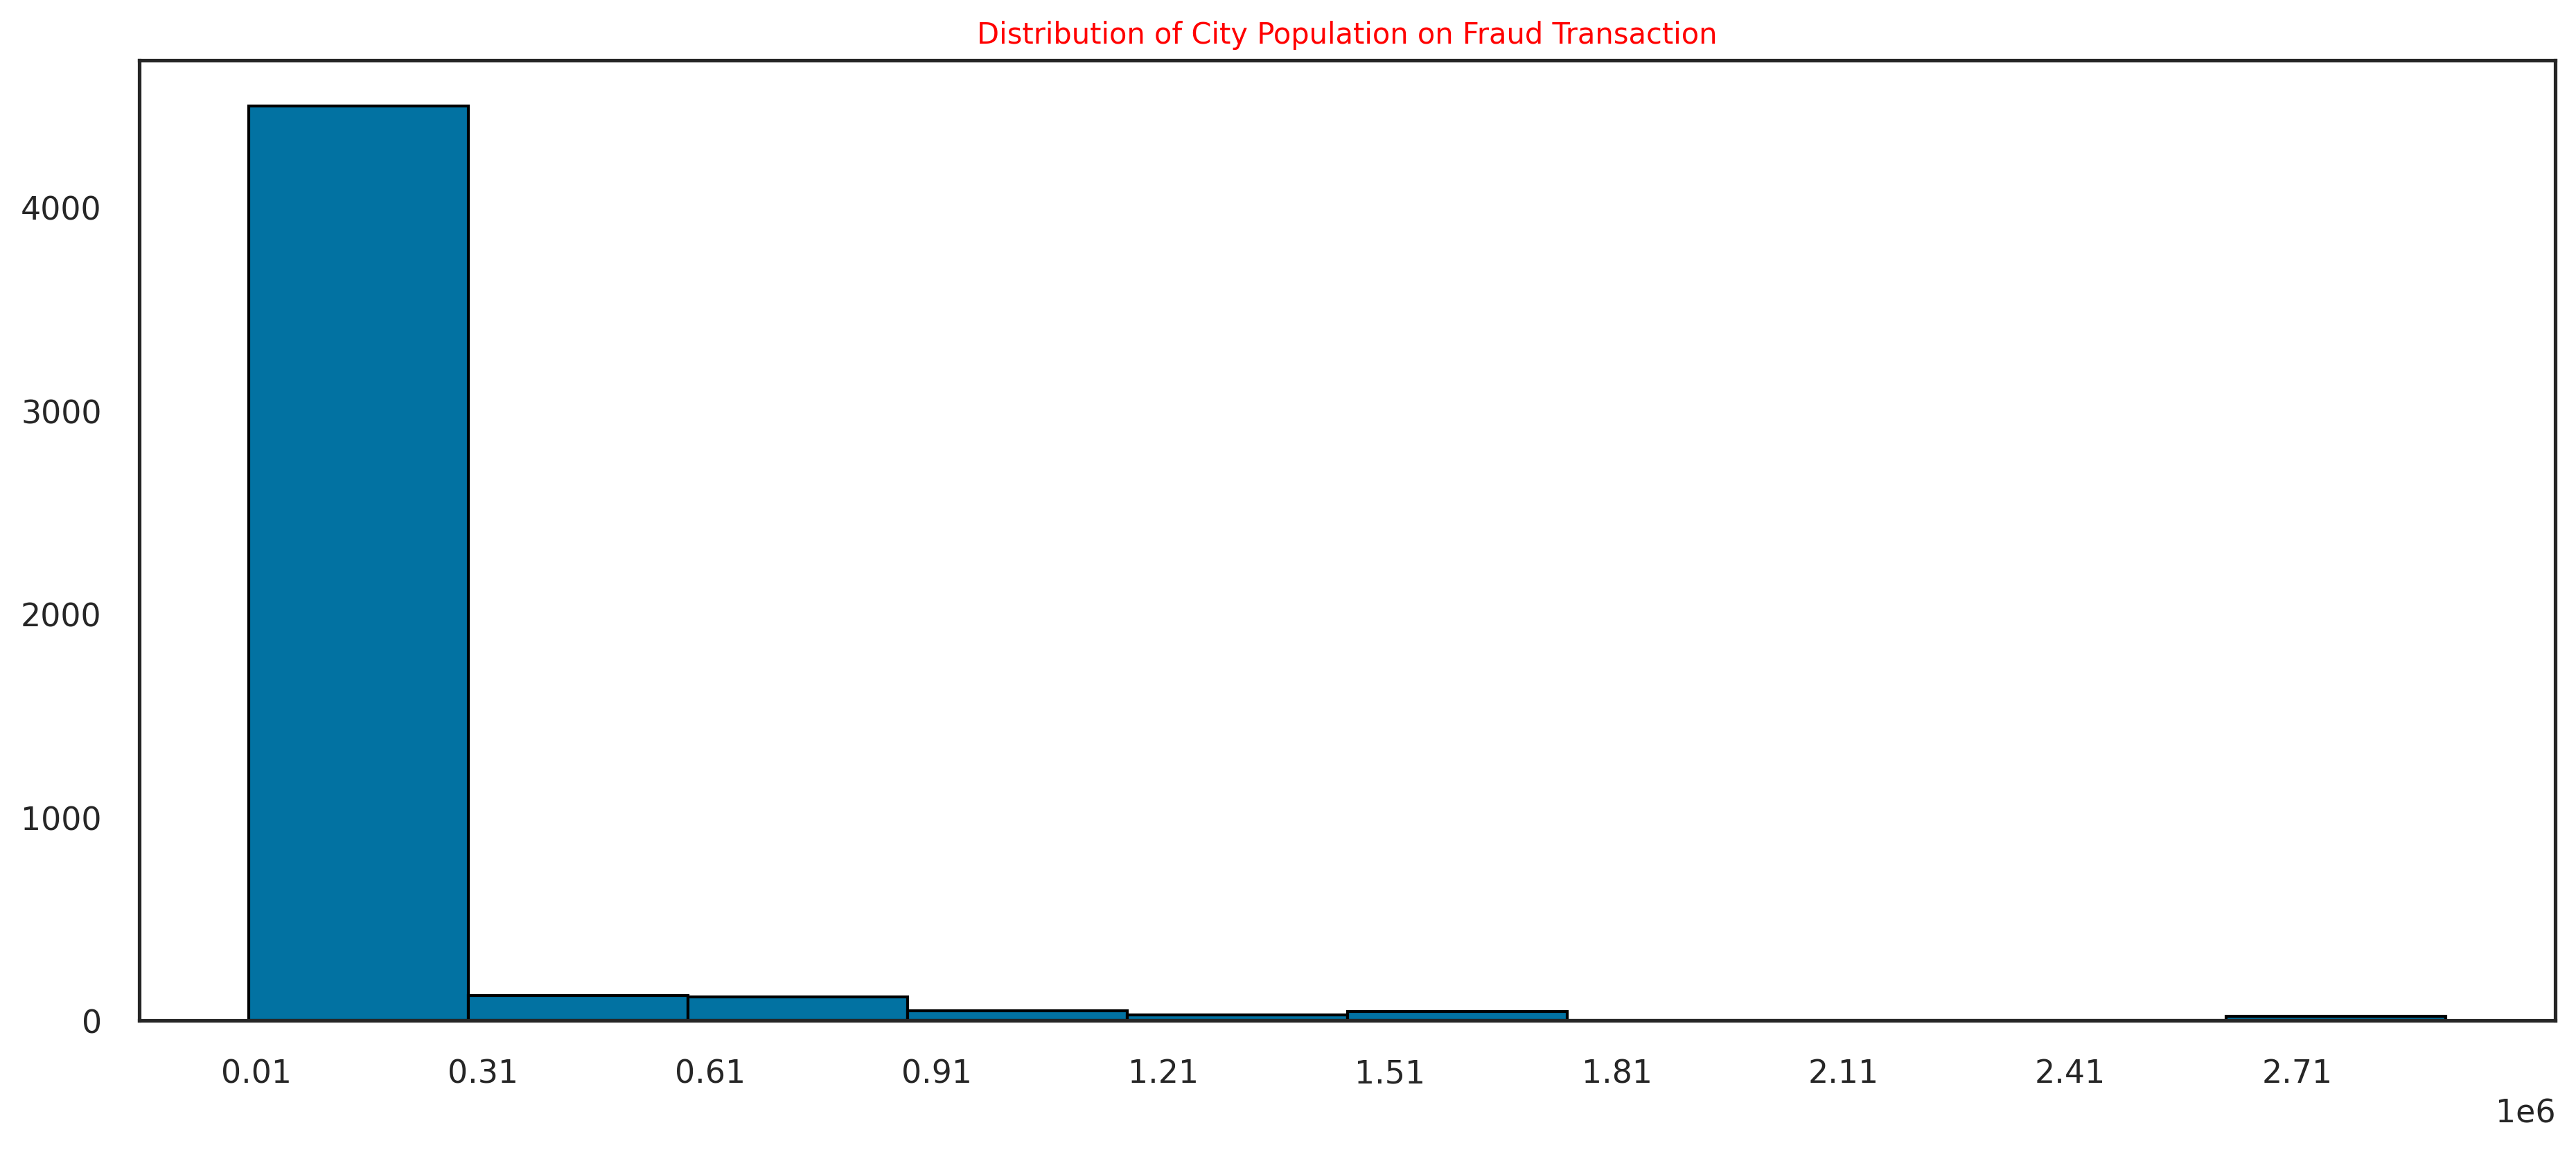

In [44]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

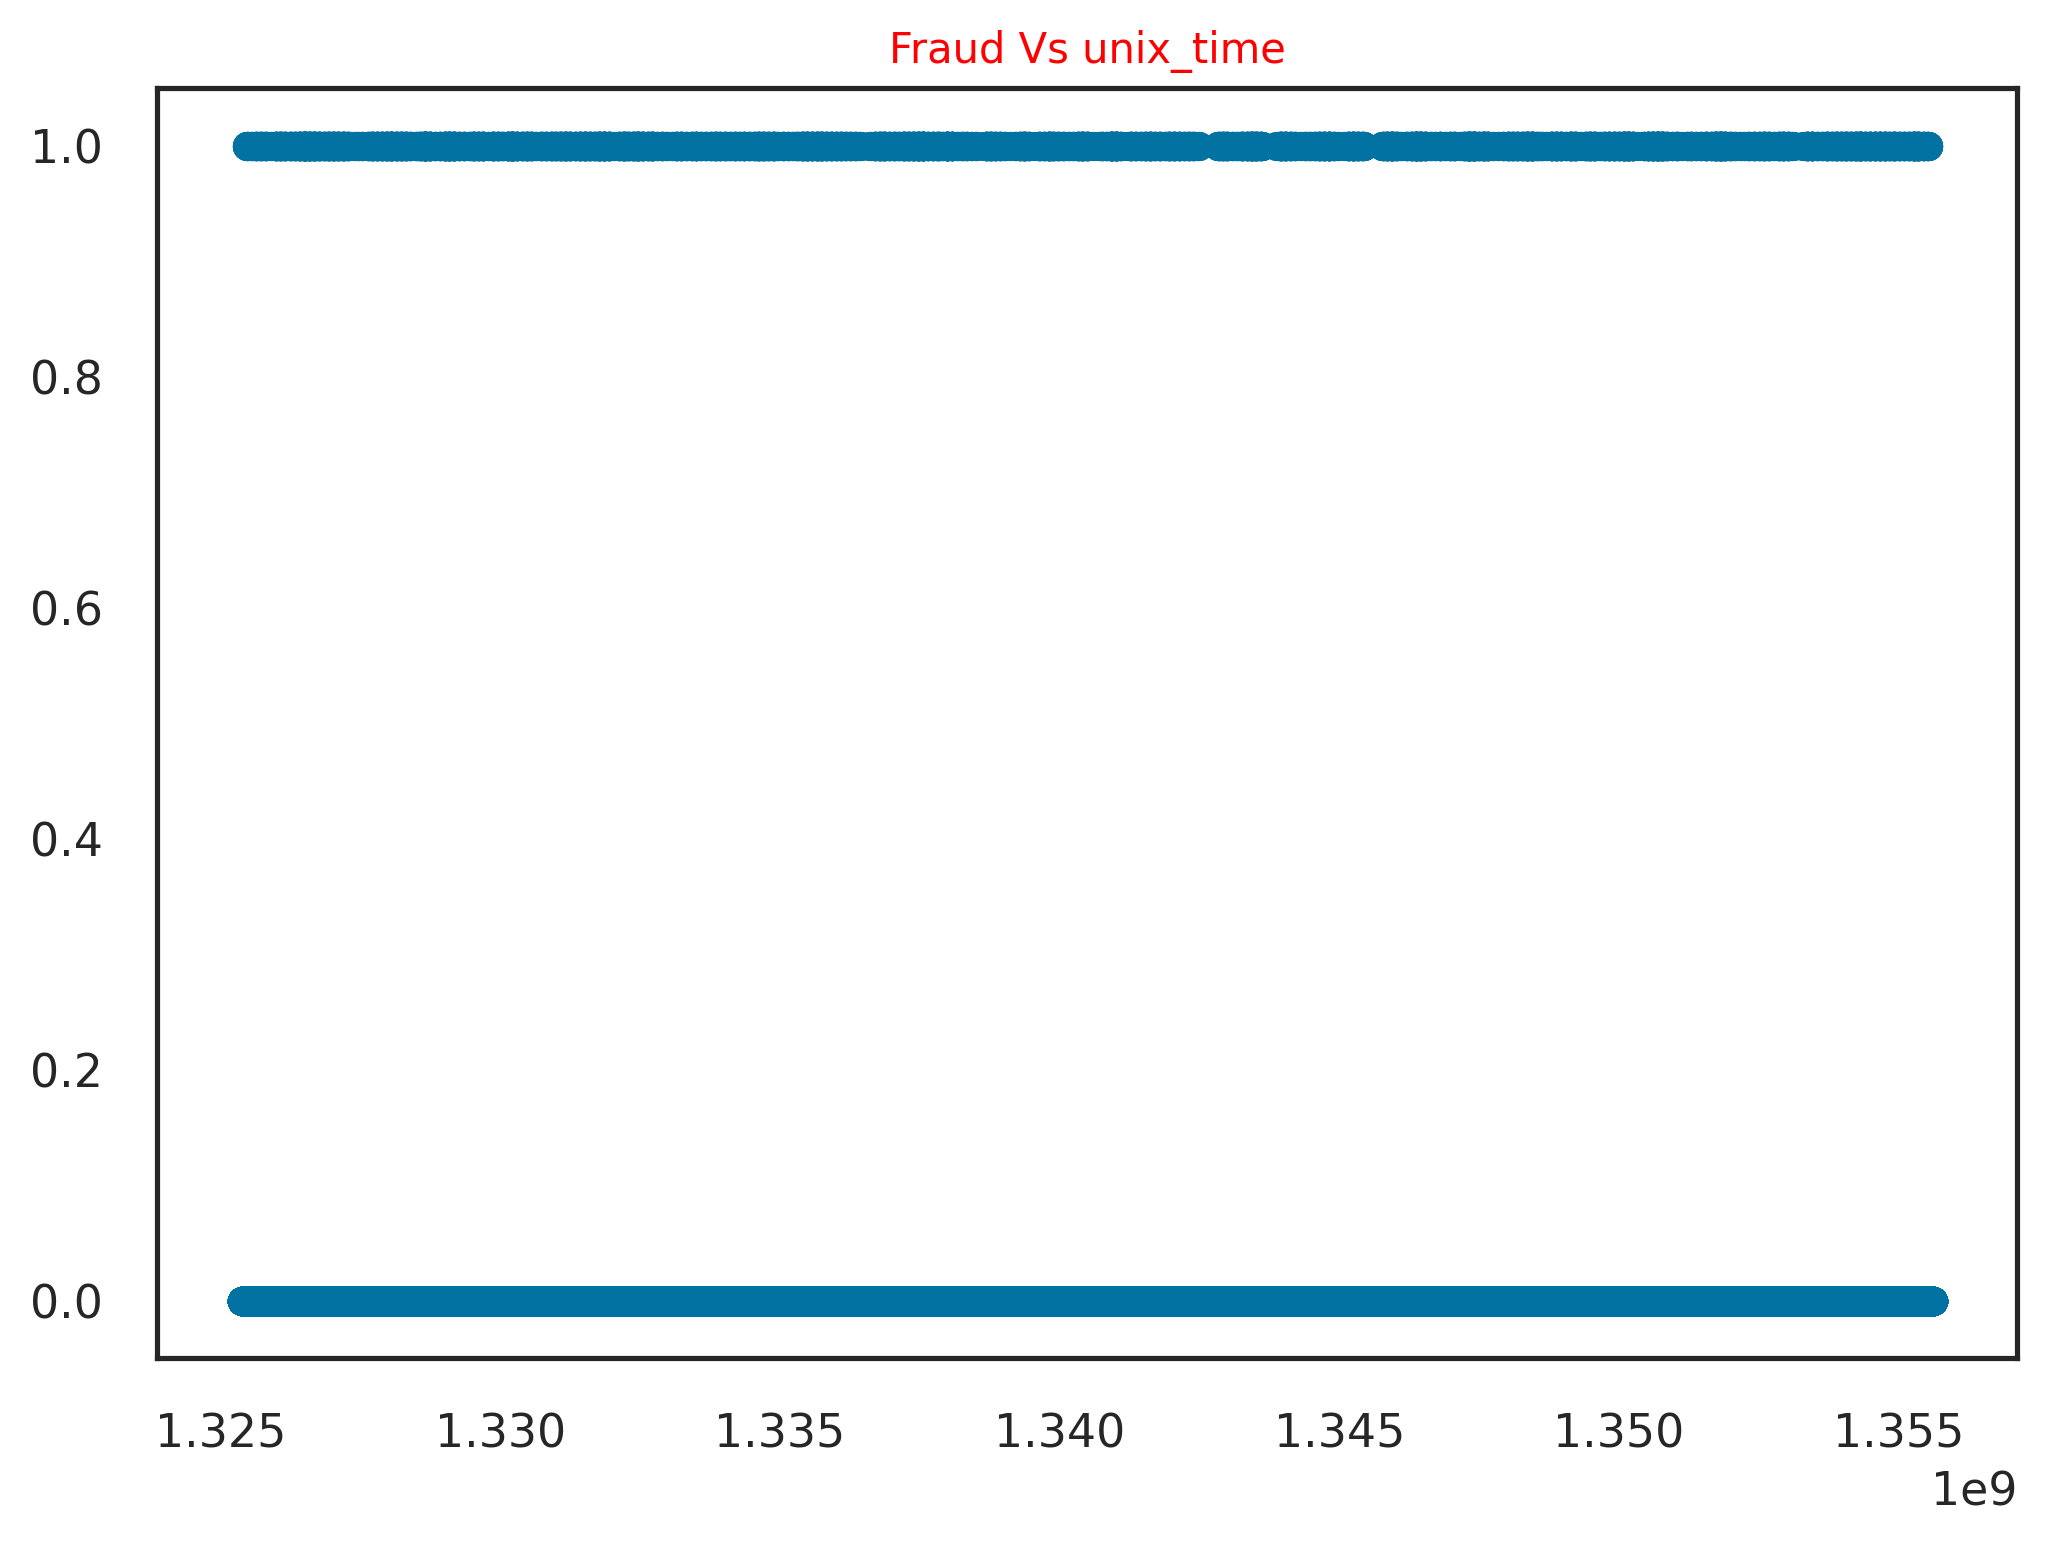

In [45]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

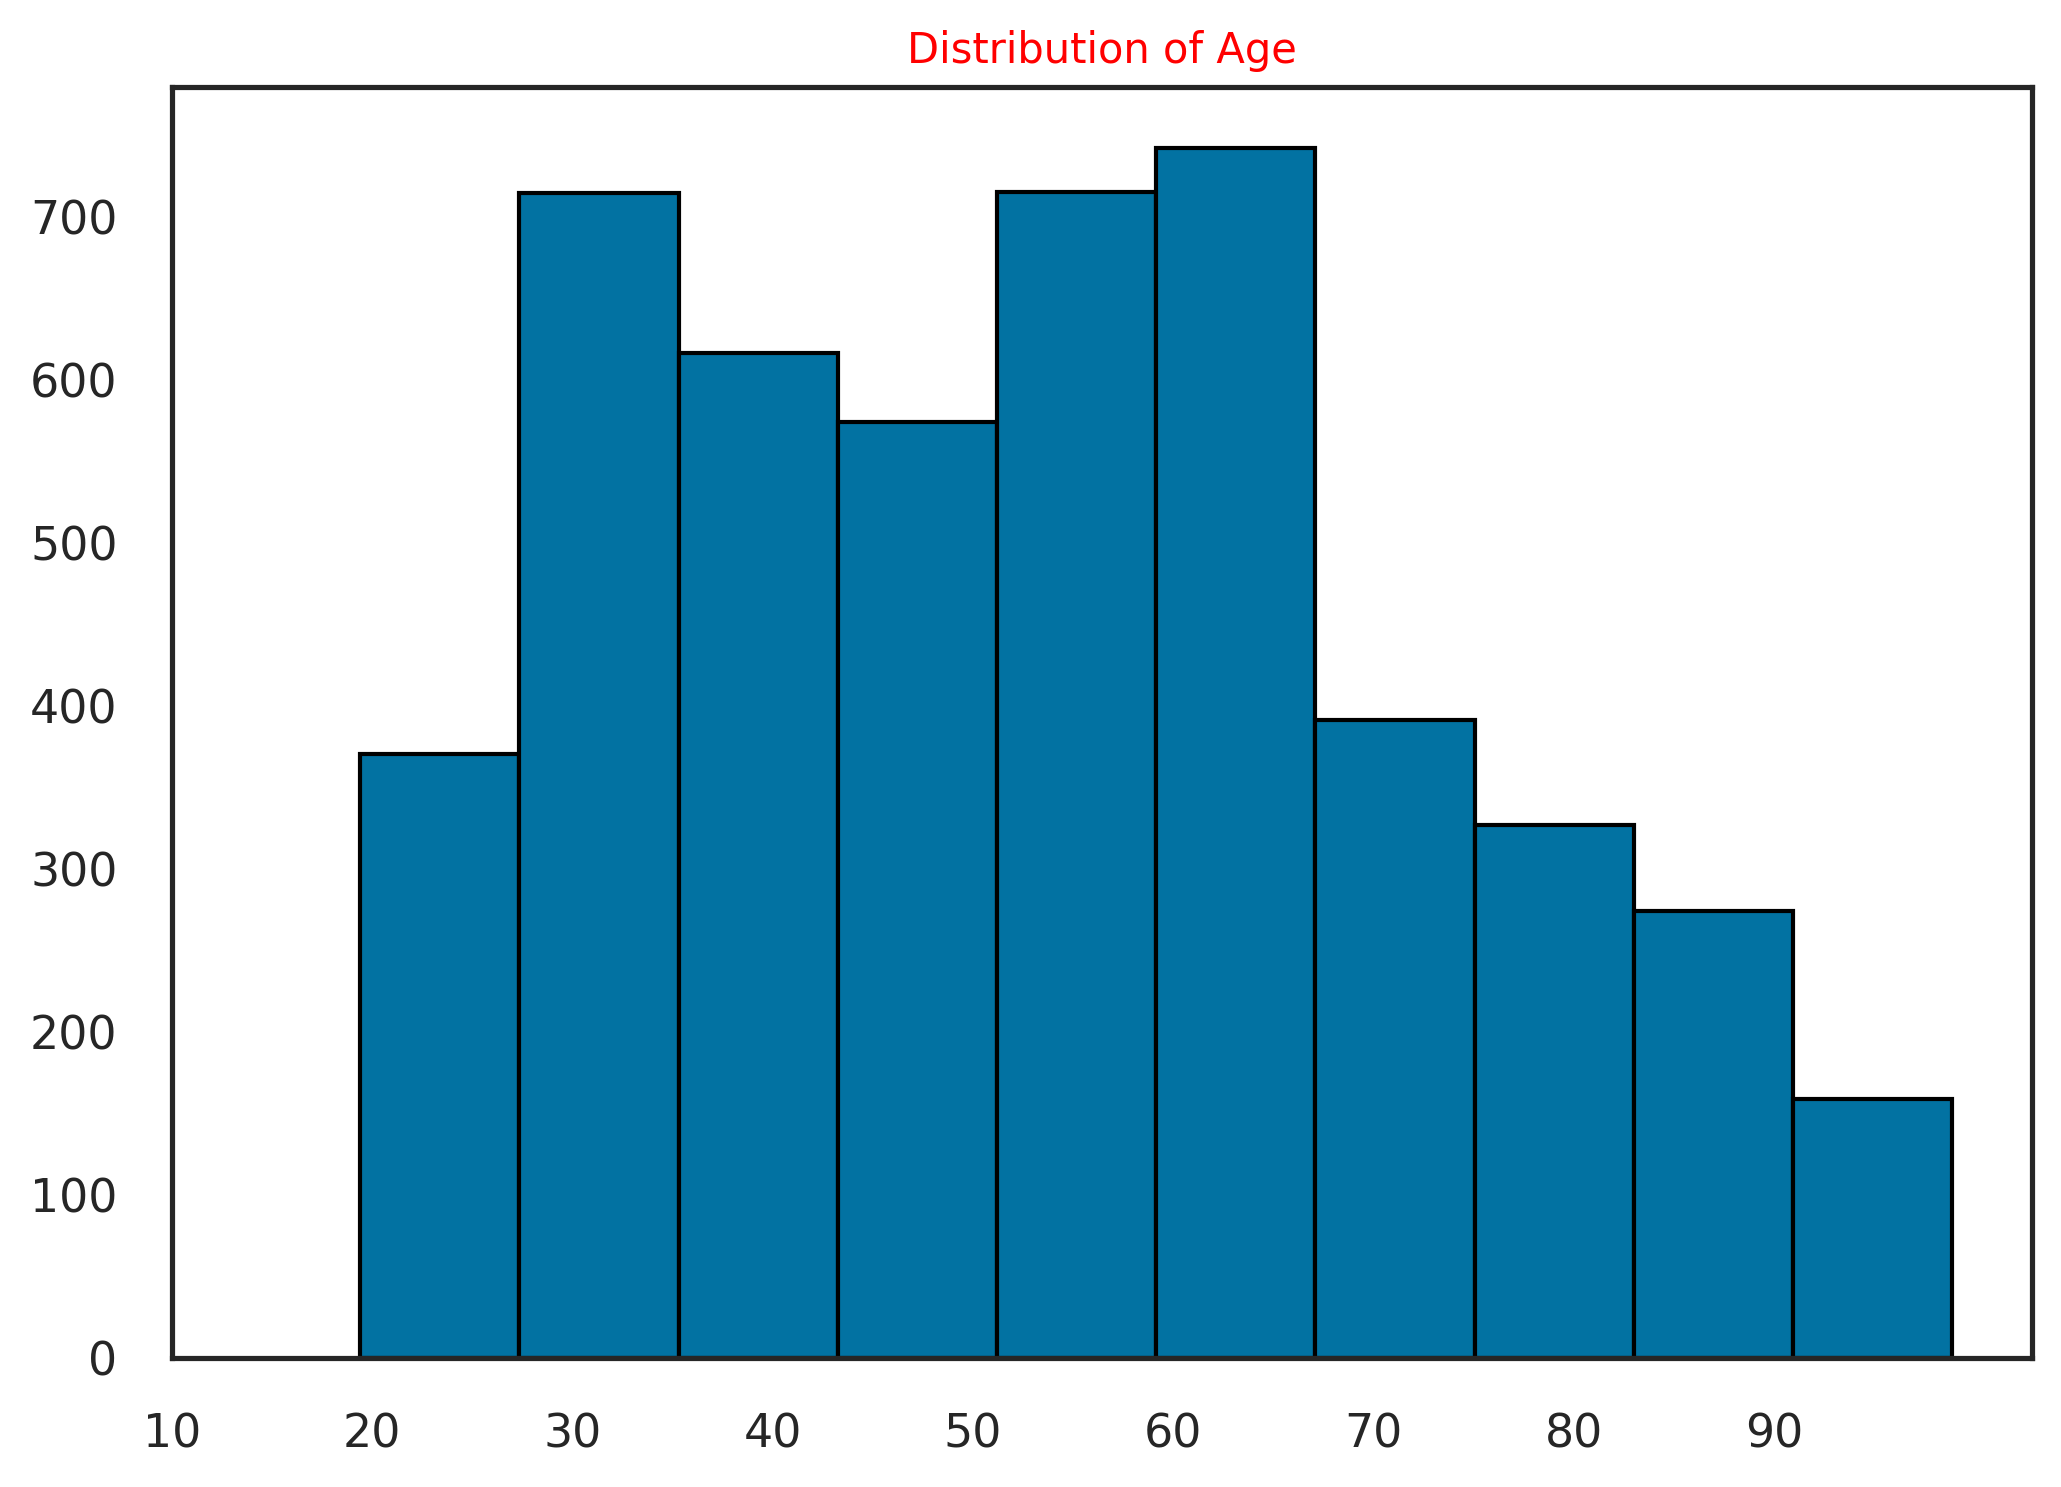

In [46]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

In [47]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

zip
63966.0    100.0
78208.0    100.0
10954.0    100.0
11747.0    100.0
11763.0    100.0
11944.0    100.0
85201.0    100.0
54980.0    100.0
12207.0    100.0
29129.0    100.0
12508.0    100.0
80019.0    100.0
28119.0    100.0
28033.0    100.0
27051.0    100.0
23523.0    100.0
10533.0    100.0
77038.0    100.0
23117.0    100.0
77027.0    100.0
14532.0    100.0
62896.0    100.0
22124.0    100.0
76048.0    100.0
75246.0    100.0
dtype: float64

In [48]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

lat
66.6933    100.0
41.1165    100.0
40.8174    100.0
40.9086    100.0
30.4287    100.0
dtype: float64

In [49]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

long
-111.8469    100.0
-77.8781     100.0
-81.8140     100.0
-118.9419    100.0
-73.8221     100.0
dtype: float64

In [50]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_lat
25.118898    100.0
40.996097    100.0
41.048576    100.0
41.043728    100.0
41.042223    100.0
dtype: float64

In [51]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_long
-166.550779    100.0
-81.482415     100.0
-81.494163     100.0
-81.500410     100.0
-81.502872     100.0
dtype: float64

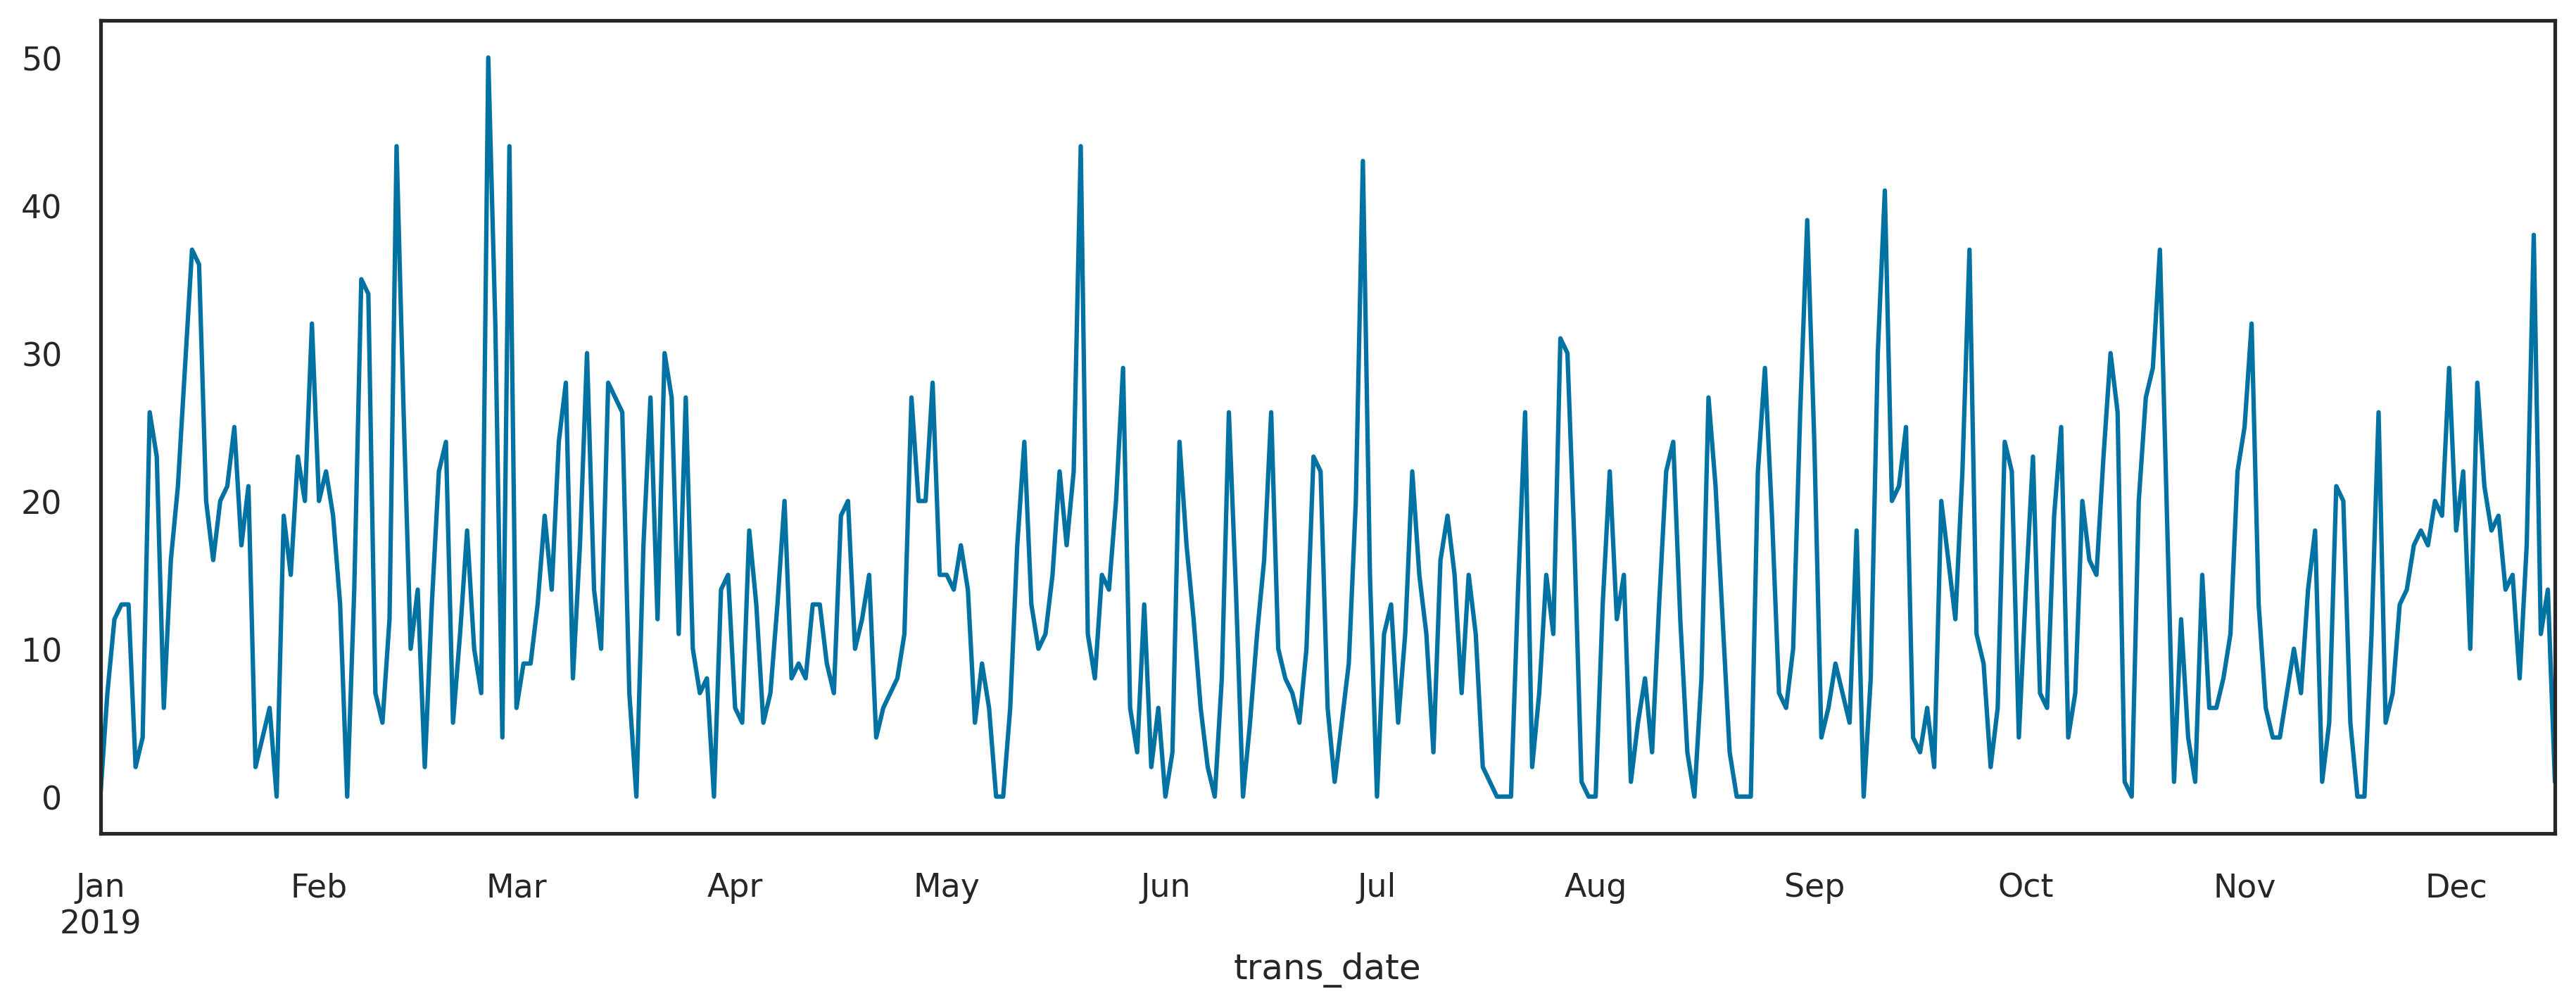

In [52]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

In [53]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  1408203


In [54]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  19


In [55]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  74116.0


In [56]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(1408203, 2)

In [57]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  370.0


In [58]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  526.81


In [59]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1371.81


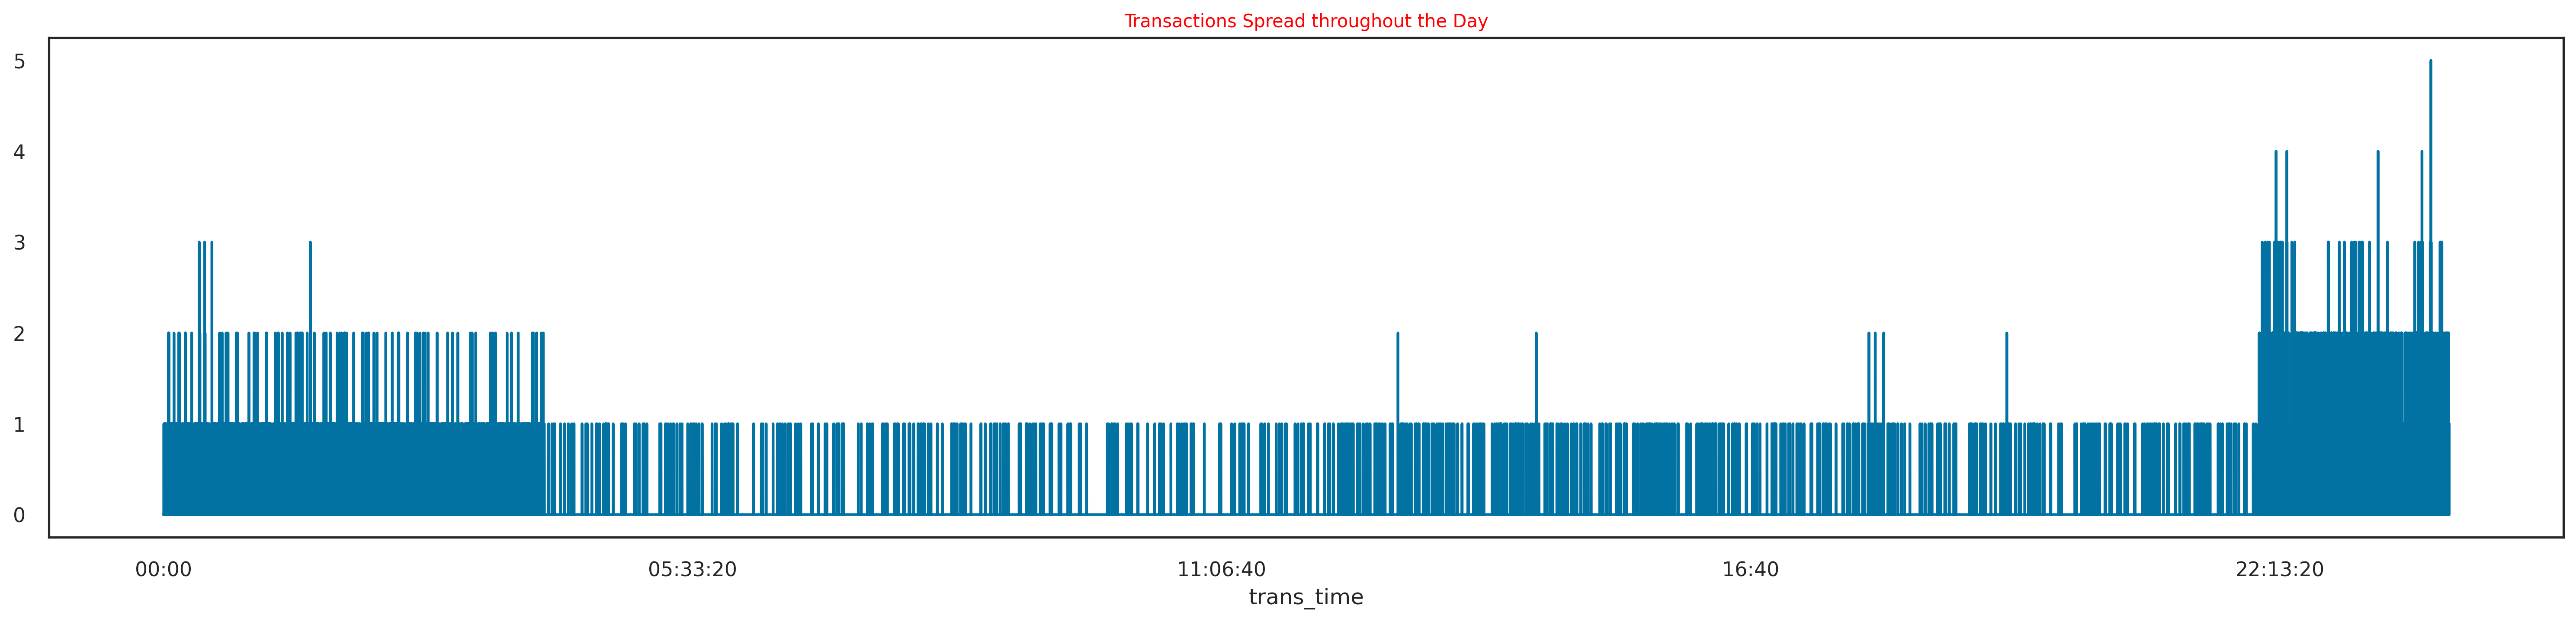

In [60]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

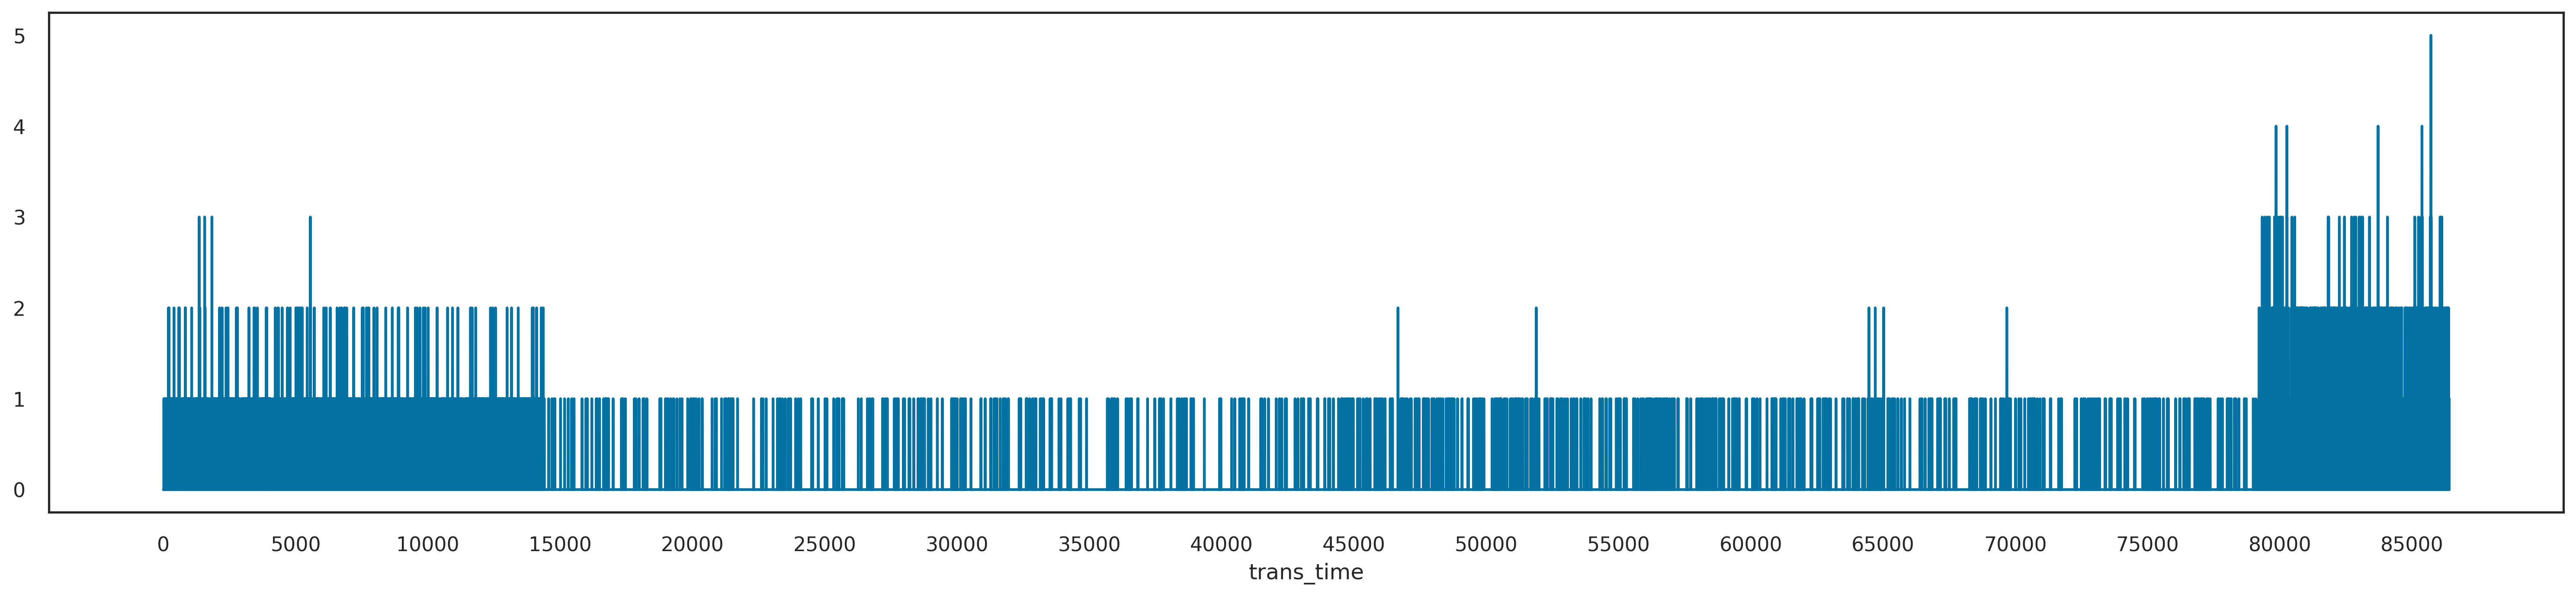

In [61]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [62]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [63]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (852484, 19)
test :  (555719, 18)


In [64]:
fraud

merchant  category     amt  gender  city  state      zip      lat  \
0            514         8    4.97       0   514     27  28654.0  36.0788   
1            241         4  107.23       0   596     47  99160.0  48.8878   
2            390         0  220.11       1   457     13  83252.0  42.1808   
3            360         2   45.00       1    83     26  59632.0  46.2306   
4            297         9   41.96       1   211     45  24433.0  38.4207   
...          ...       ...     ...     ...   ...    ...      ...      ...   
852479       458         1  132.60       0    42      4  91702.0  34.1248   
852480       344         5   22.47       0   475     43  76857.0  31.9571   
852481       654         5   38.57       0   847     37  97492.0  43.7575   
852482        15         6   30.91       1   318     31   7640.0  40.9918   
852483       526         5  129.89       0   873     51      NaN      NaN   

            long  city_pop  job        dob     unix_time  merch_lat  \
0       -81.1781    3495.0  368 1988-03-09  1.325376e+09  36.011293   
1      -118.2105     149.0  425 1978-06-21  1.325376e+09  49.159047   
2      -112.2620    4154.0  305 1962-01-19  1.325376e+09  43.150704   
3      -112.1138    1939.0  326 1967-01-12  1.325376e+09  47.034331   
4       -79.4629      99.0  116 1986-03-28  1.325376e+09  38.674999   
...          ...       ...  ...        ...           ...        ...   
852479 -117.9031   59705.0   84 1983-06-23  1.355608e+09  33.374988   
852480  -98.9656    1791.0  111 1965-07-26  1.355608e+09  31.855220   
852481 -122.4810     597.0  200 1961-05-19  1.355608e+09  43.405187   
852482  -73.9800    4664.0  384 1965-06-30  1.355608e+09  41.781513   
852483       NaN       NaN  490        NaT           NaN        NaN   

        merch_long  is_fraud        age  trans_date  trans_time  
0       -82.048315       0.0  36.319564      737060          18  
1      -118.186462       0.0  46.042851      737060          44  
2      -112.154481       0.0  62.472988      737060          51  
3      -112.561071       0.0  57.489427      737060          76  
4       -78.632459       0.0  38.270249      737060         186  
...            ...       ...        ...         ...         ...  
852479 -117.352132       0.0  41.034632      737408       77951  
852480  -98.417397       0.0  58.955180      737408       77953  
852481 -123.054110       0.0  63.144221      737408       77956  
852482  -74.976856       0.0  59.026413      737408       77987  
852483         NaN       NaN        NaN      737408       78001  

[852484 rows x 19 columns]

In [65]:
corr = fraud.corr()
corr.style.background_gradient(cmap='coolwarm')